# Step 1: Load and Preprocess Images

In [1]:
'''

import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

folder_path = 'Phase_shifter-new/no_phase/no_phase_first100'
images = []
labels = []
for filename in os.listdir(folder_path):
    if filename.endswith(".bmp"):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        image = image.convert('L')
        image = image.resize((128,128))
        image_array = np.array(image)
        images.append(image_array[40:90,40:90])
        labels.append([1,0,0])

folder_path = 'Phase_shifter-new/pi_by_2_phase/pi_by_2_phase_first100'
for filename in os.listdir(folder_path):
    if filename.endswith(".bmp"):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        image = image.convert('L')
        image = image.resize((128,128))
        image_array = np.array(image)
        images.append(image_array[40:90,40:90])
        labels.append([0,1,0])
        
folder_path = 'Phase_shifter-new/zero_phase/zero_phase_first100'
for filename in os.listdir(folder_path):
    if filename.endswith(".bmp"):
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        image = image.convert('L')
        image = image.resize((128,128))
        image_array = np.array(image)
        images.append(image_array[40:90,40:90])
        labels.append([0,0,1])
        
labels = np.array(labels)
images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=16)
print("Total images loaded and preprocessed:", len(images))
'''


Total images loaded and preprocessed: 300


### New Code

In [2]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

# Define folders for each label
folder_paths = {
    "no_phase": 'Phase_shifter-new/no_phase/no_phase_first100',
    "pi_by_2_phase": 'Phase_shifter-new/pi_by_2_phase/pi_by_2_phase_first100',
    "zero_phase": 'Phase_shifter-new/zero_phase/zero_phase_first100'
}

images = []
labels = []

# Process each folder and assign labels
for label, folder_path in enumerate(folder_paths.values()):
    for filename in os.listdir(folder_path):
        if filename.endswith(".bmp"):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            image = image.convert('L')  # Convert to grayscale
            image_array = np.array(image)
            images.append(image_array)
            # One-hot encoding: [1,0,0] for "no_phase", [0,1,0] for "pi_by_2_phase", [0,0,1] for "zero_phase"
            labels.append([int(label == 0), int(label == 1), int(label == 2)])

# Convert lists to numpy arrays
labels = np.array(labels)
images = np.array(images) / 255.0  # Normalize images to [0, 1] range
images = np.expand_dims(images, axis=-1)  # Add channel dimension

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=16)
print("Total images loaded and preprocessed:", len(images))


Total images loaded and preprocessed: 300


# Step 2: Create classification model

### New Classification Model Specs

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(711, 651, 1), padding="same"))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.GlobalAveragePooling2D())
# Fully connected layers
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=3, activation='softmax'))

# Compiling the CNN
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


/Users/nayanthara/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 711, 651, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 711, 651, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 356, 326, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,235 (90.76 KB)

 Trainable params: 23,235 (90.76 KB)

 Non-trainable params: 0 (0.00 B)

# Step 3: Train model

In [5]:
import sys
import os
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Suppress output class to mute the training logs
class SuppressOutput:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Convert training and validation data to TensorFlow dataset format
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(32).repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = val_dataset.batch(32)

# Define the callback for early stopping based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

# Train the model with early stopping
with SuppressOutput():
    history = model.fit(
        train_dataset,
        epochs=60,
        steps_per_epoch=len(X_train) // 32,  # Define steps per epoch
        validation_data=val_dataset,
        callbacks=[early_stopping]
    )

print("Model training complete.")


Model training complete.


In [6]:
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from lime import lime_image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import imageio
import os
import PIL
import cv2

100%|██████████| 200/200 [00:14<00:00, 13.74it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
100%|██████████| 200/200 [00:14<00:00, 14.27it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
100%|██████████| 200/200 [00:14<00:00, 14.22it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
100%|██████████| 200/200 [00:14<00:00, 14.22it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
100%|██████████| 200/200 [00:13<00:00, 14.33it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
100%|██████████| 200/200 [00:14<00:00, 14.27it/s]
Clipping input data to the val

KeyboardInterrupt: 

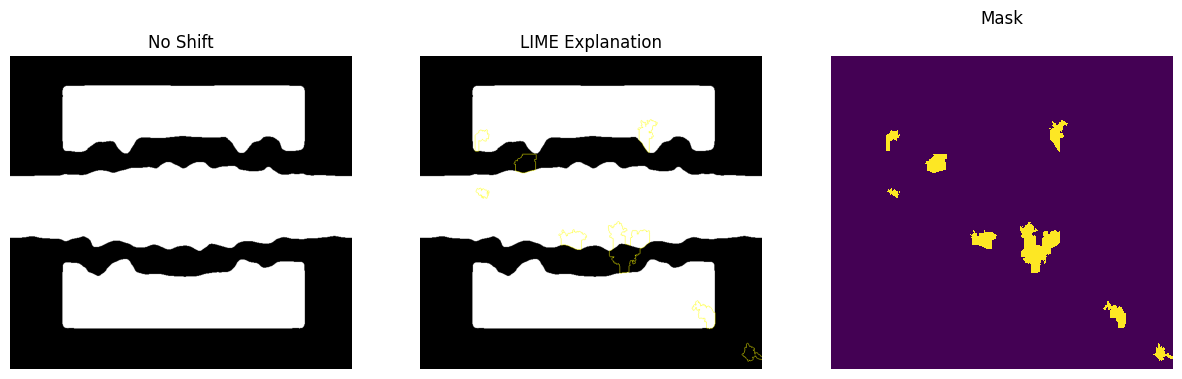

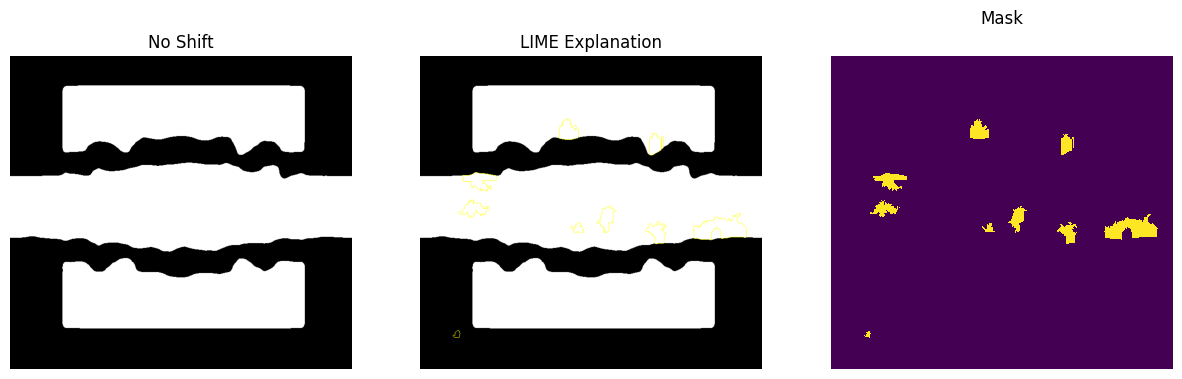

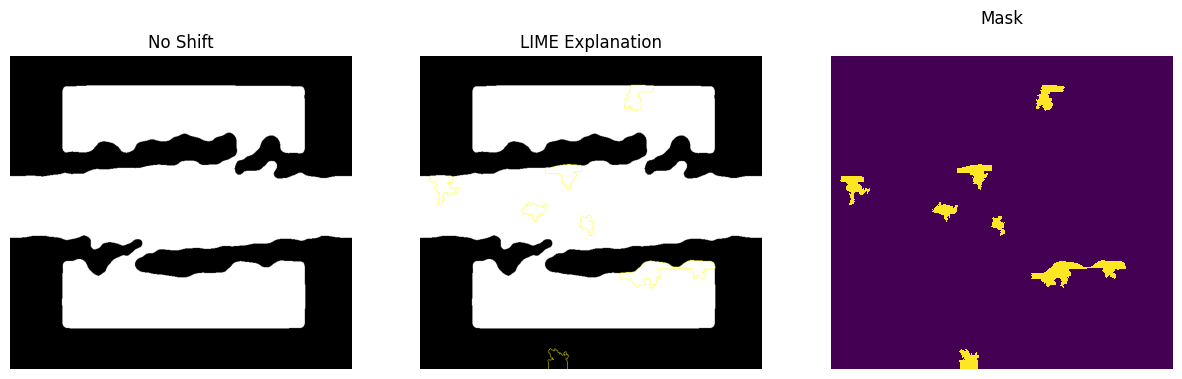

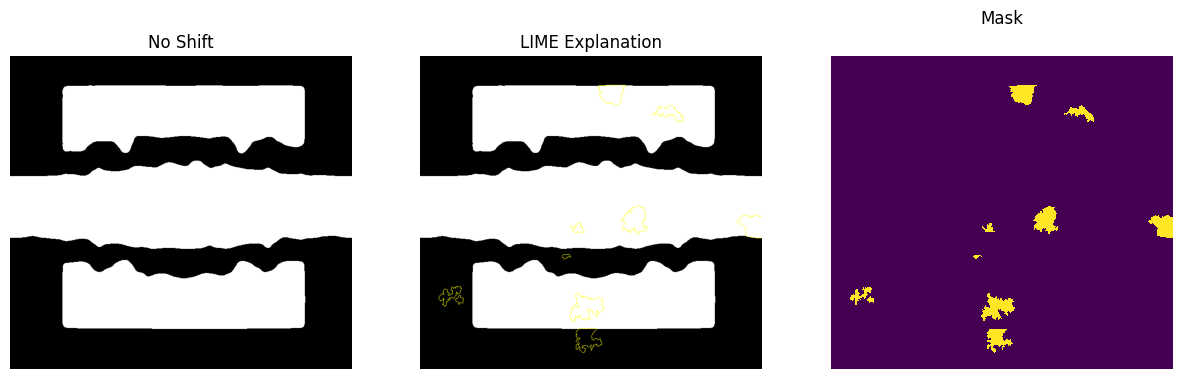

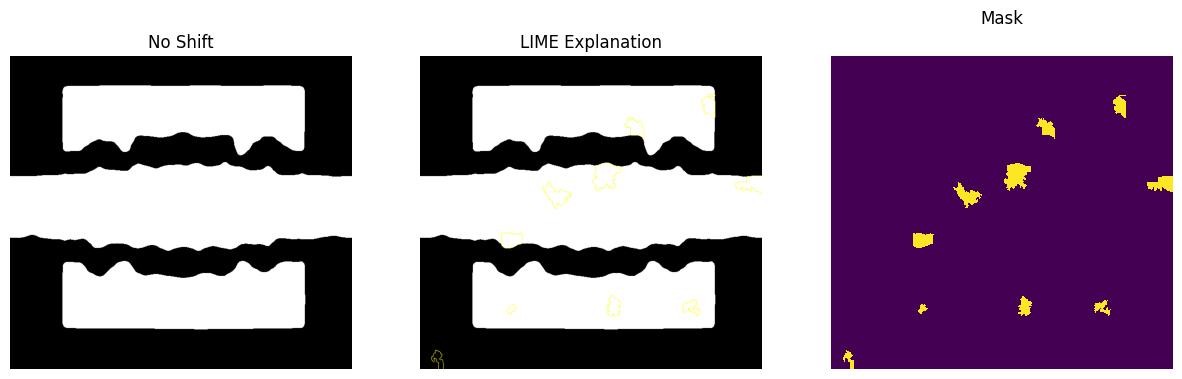

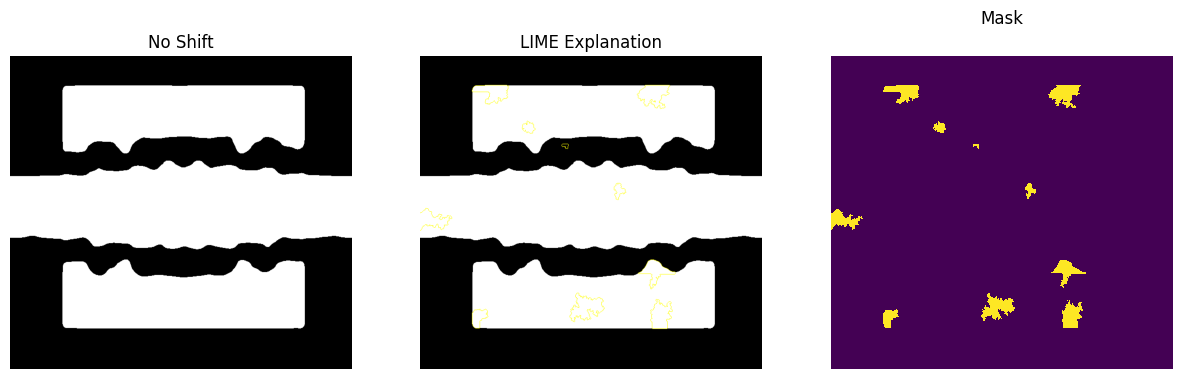

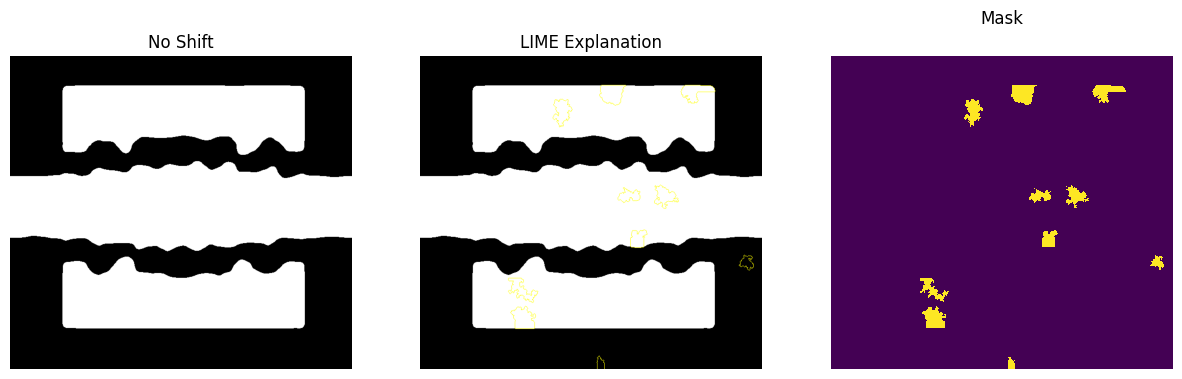

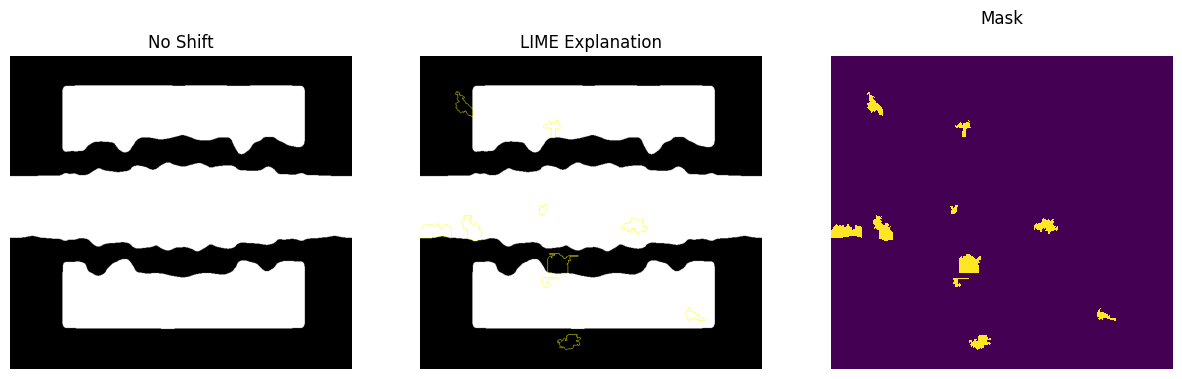

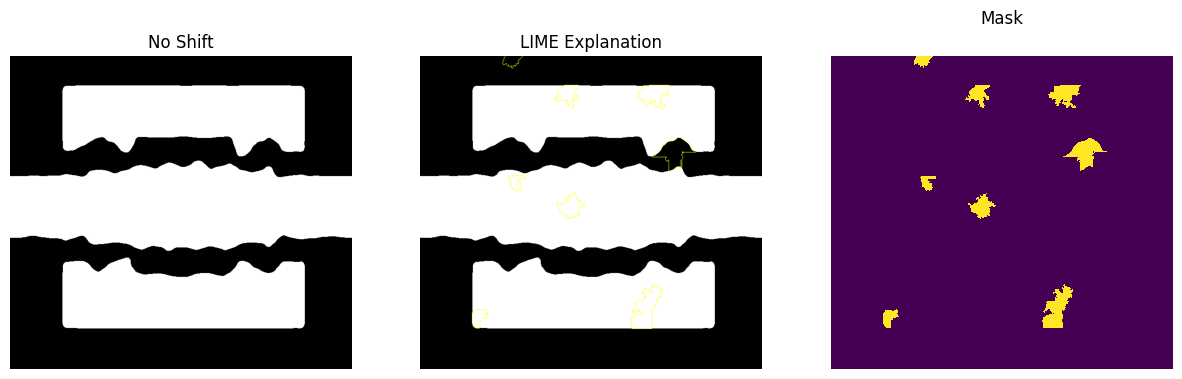

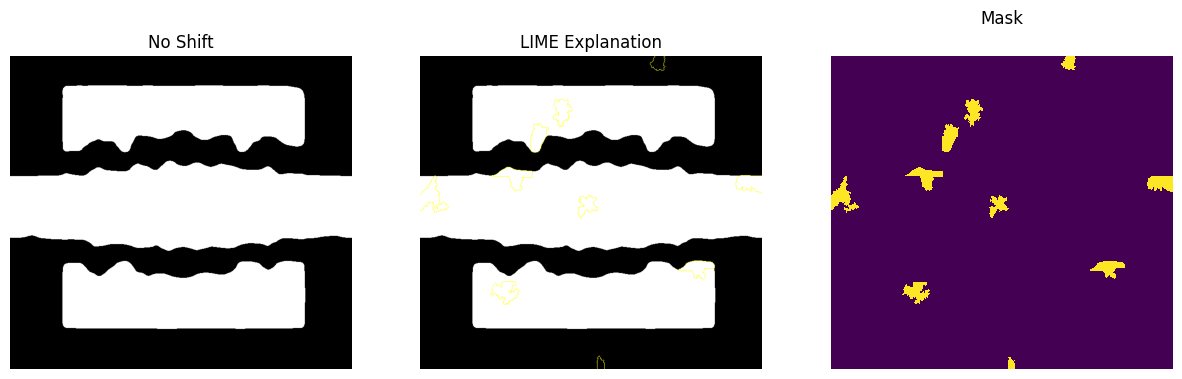

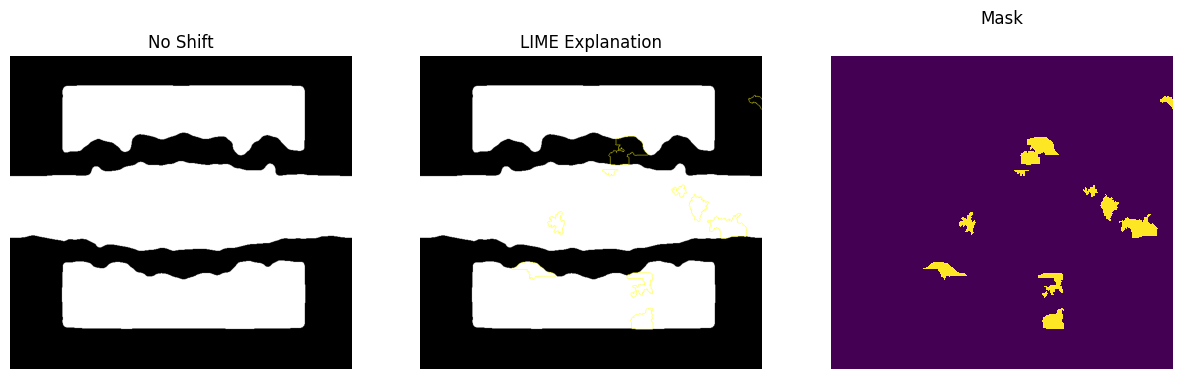

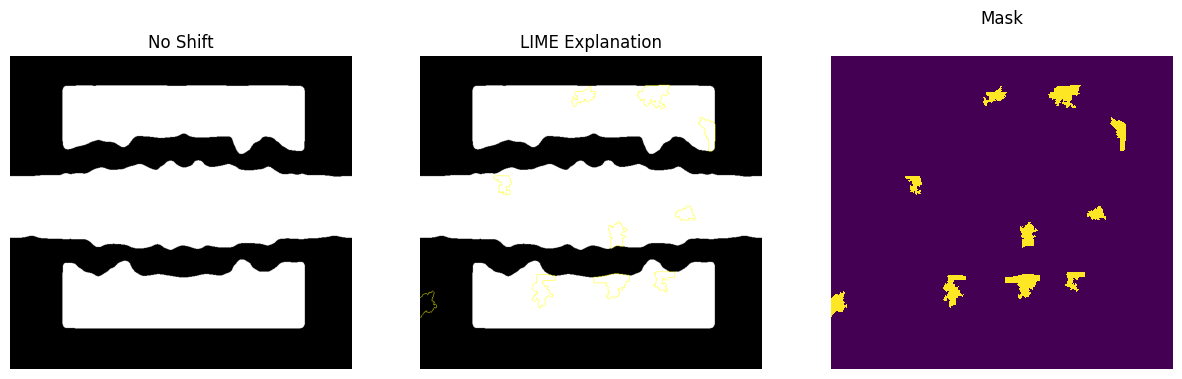

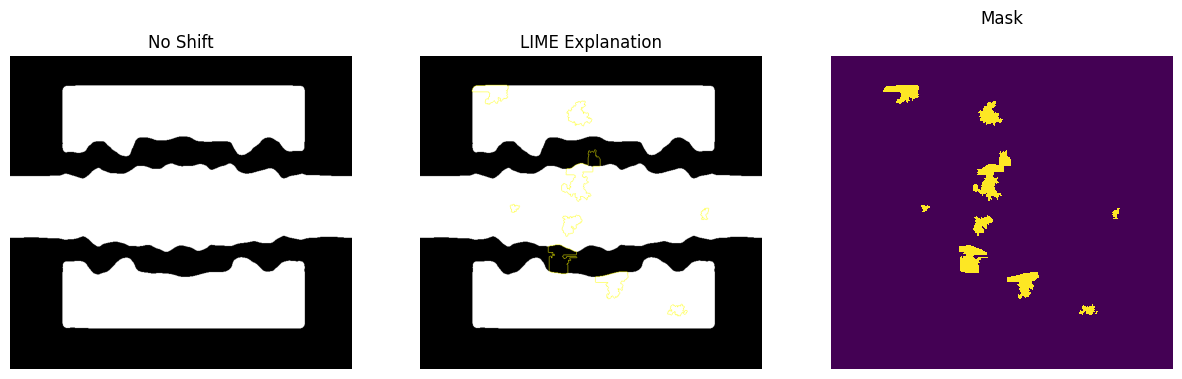

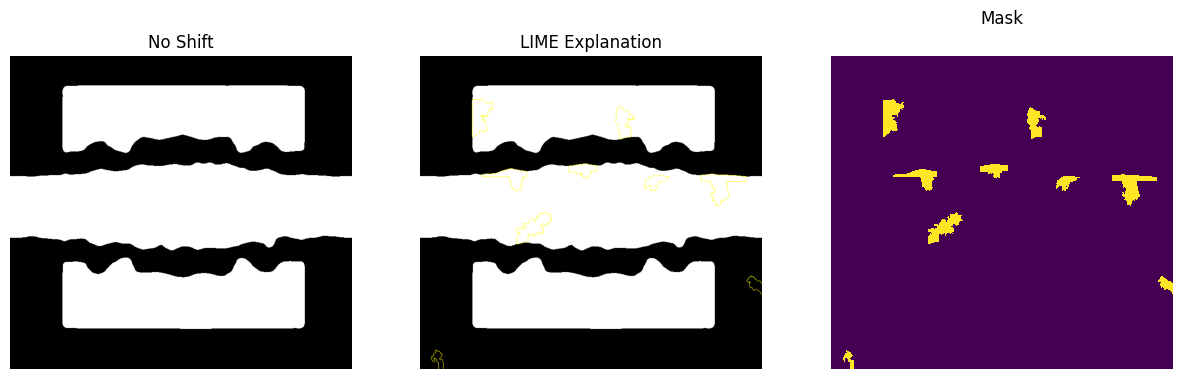

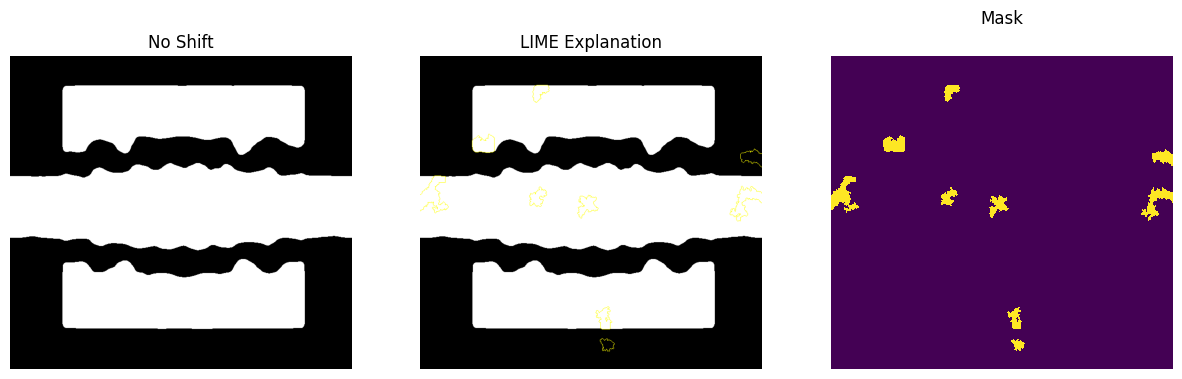

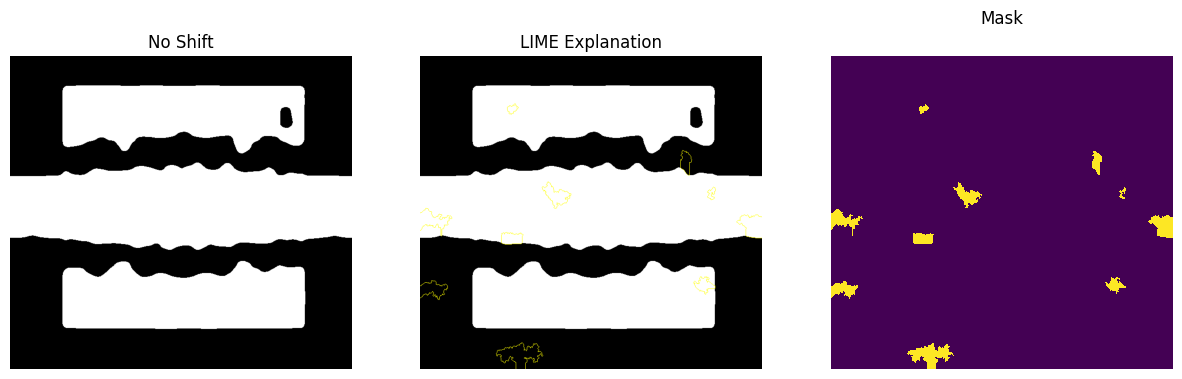

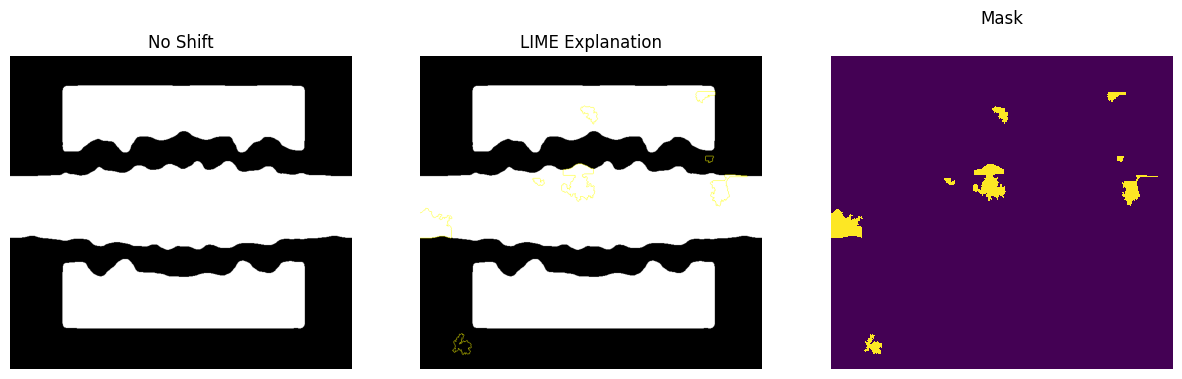

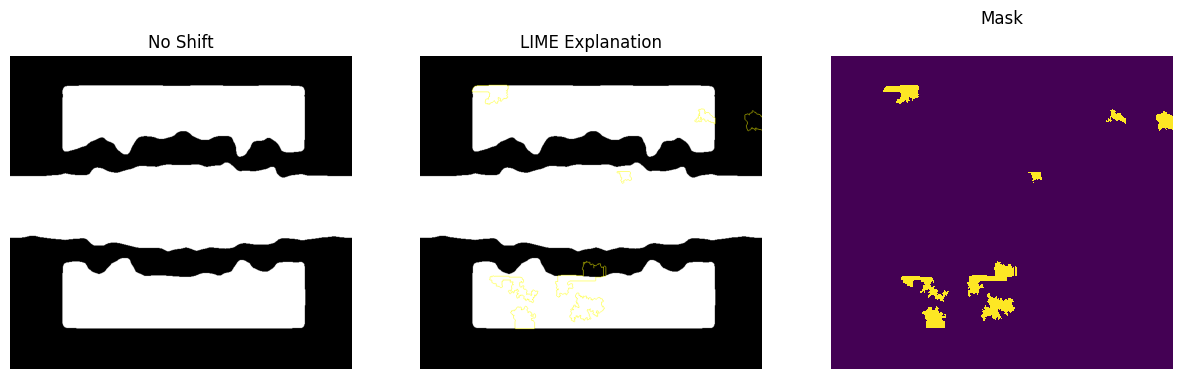

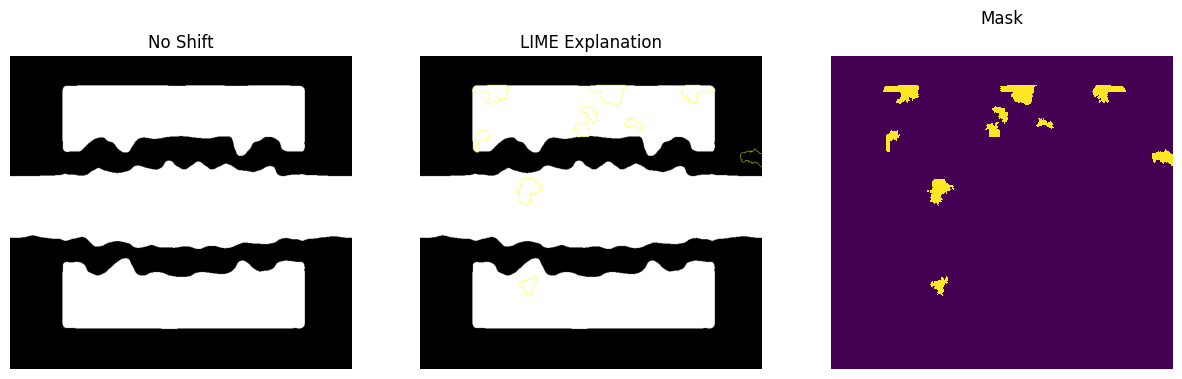

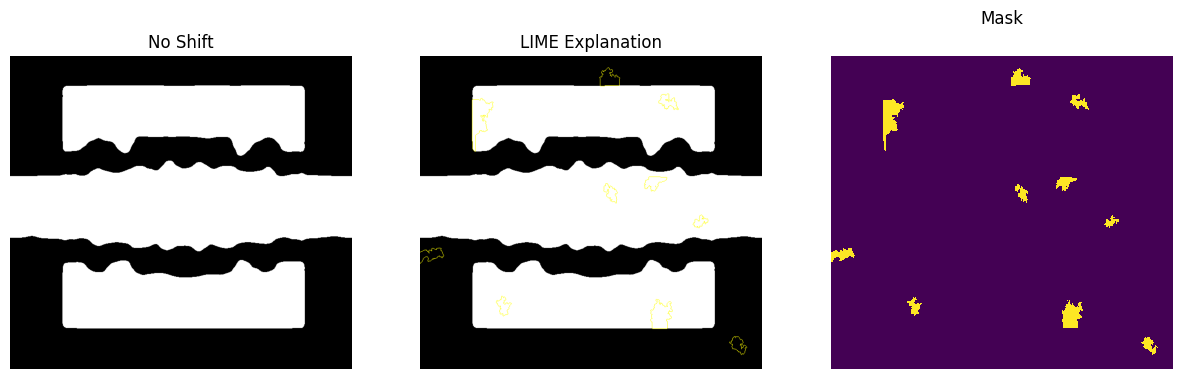

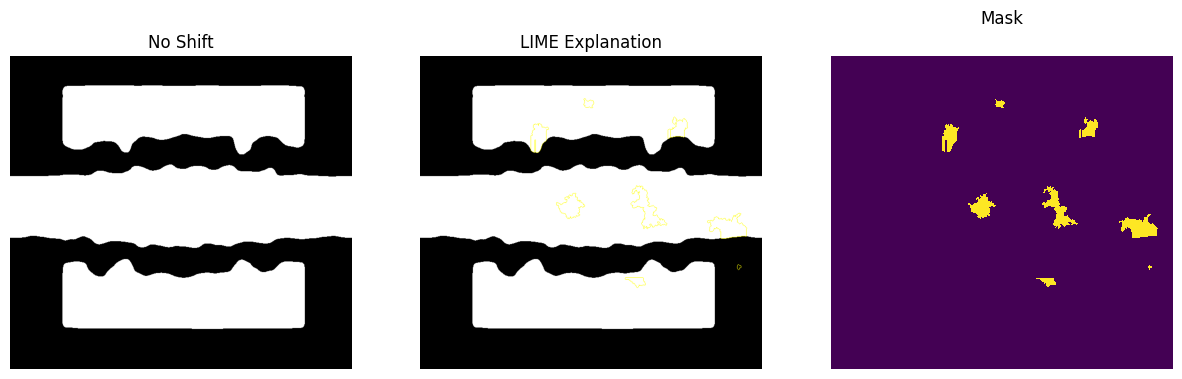

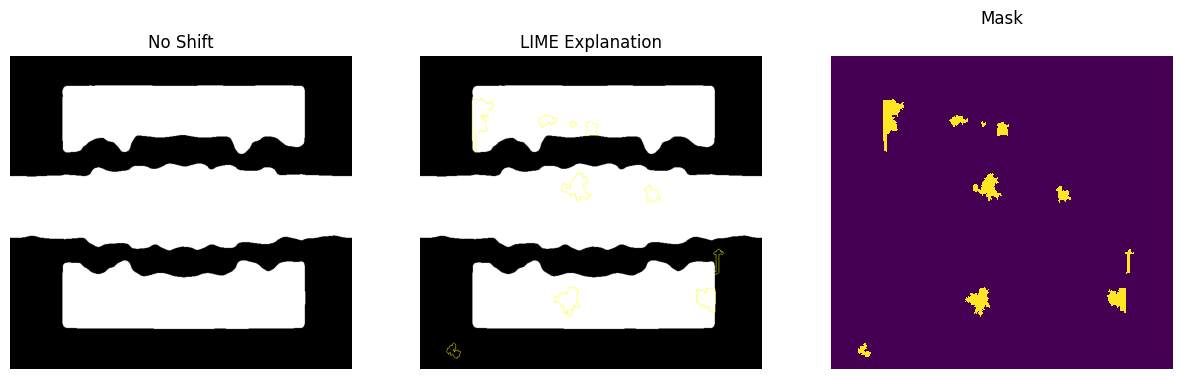

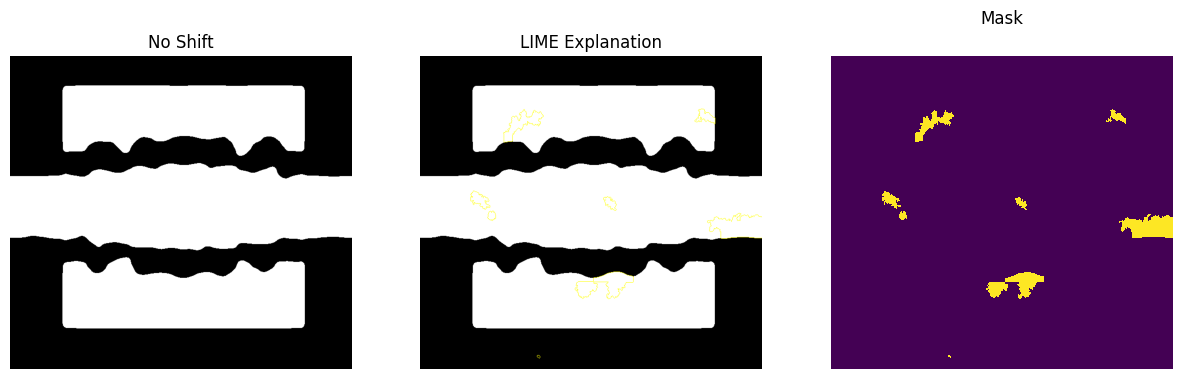

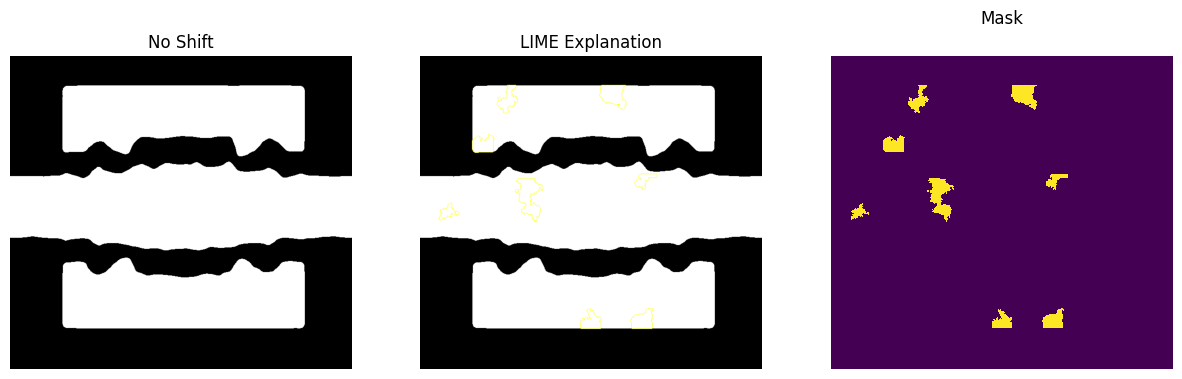

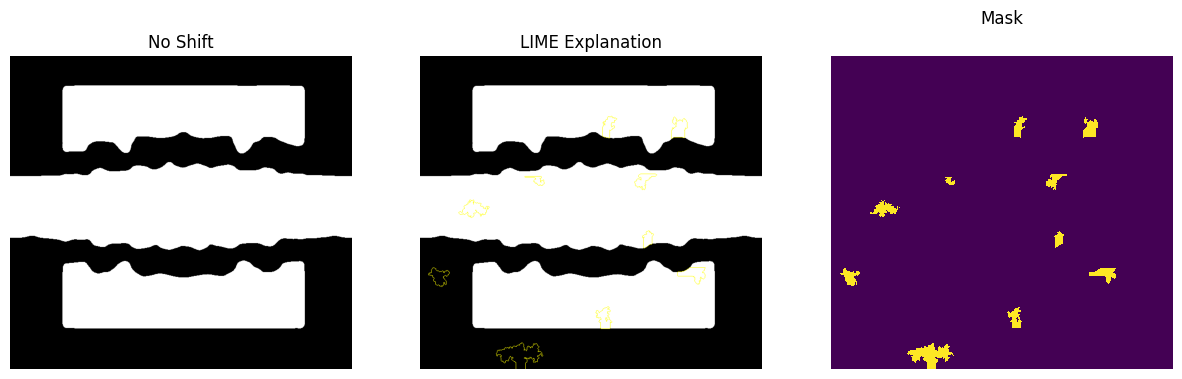

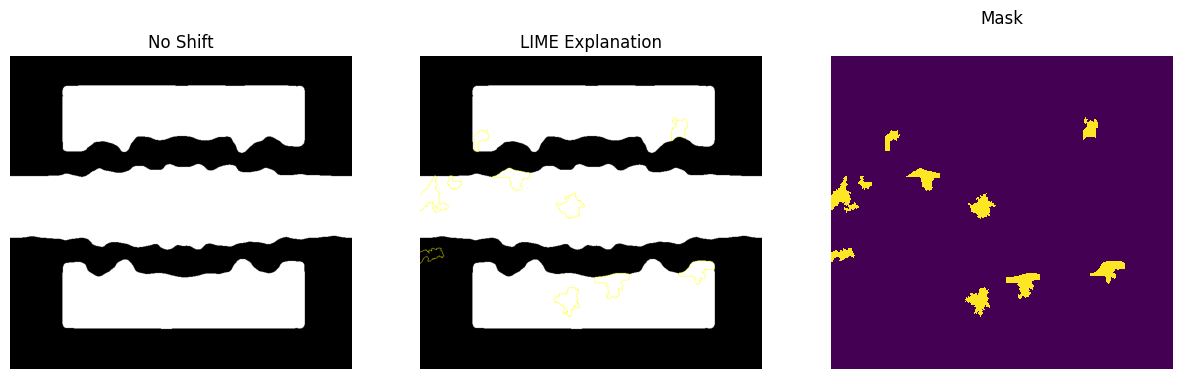

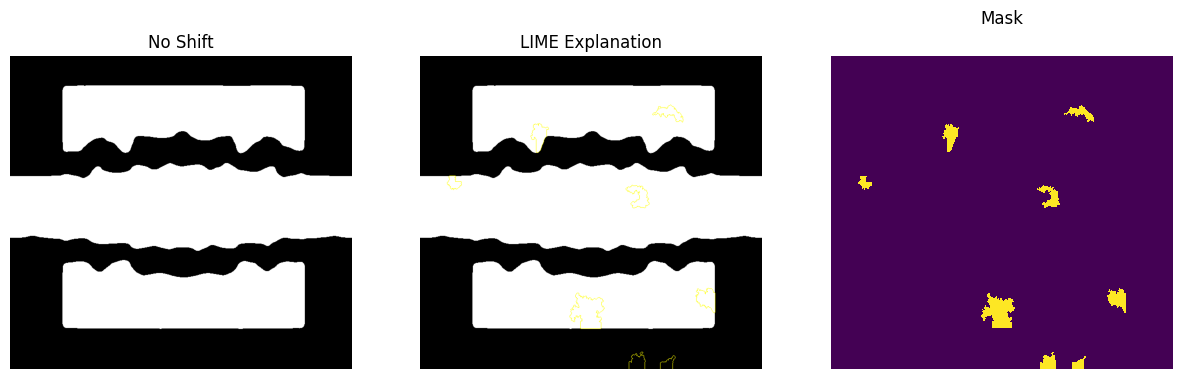

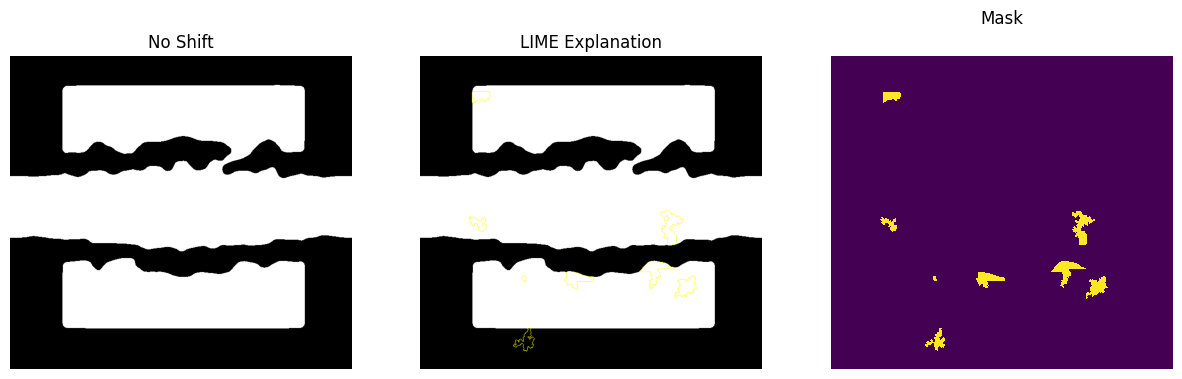

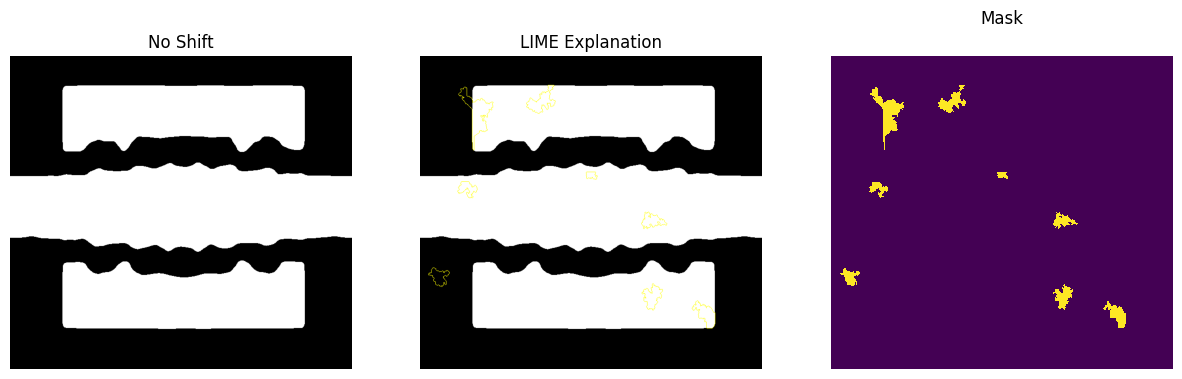

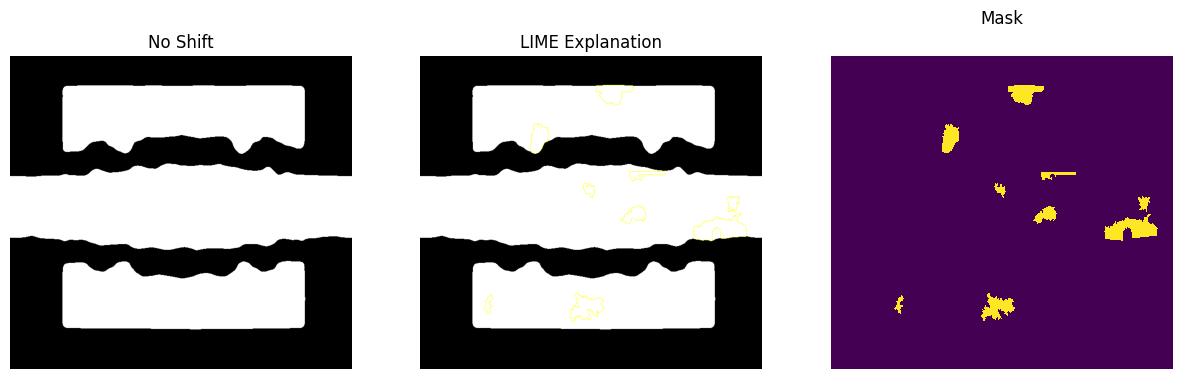

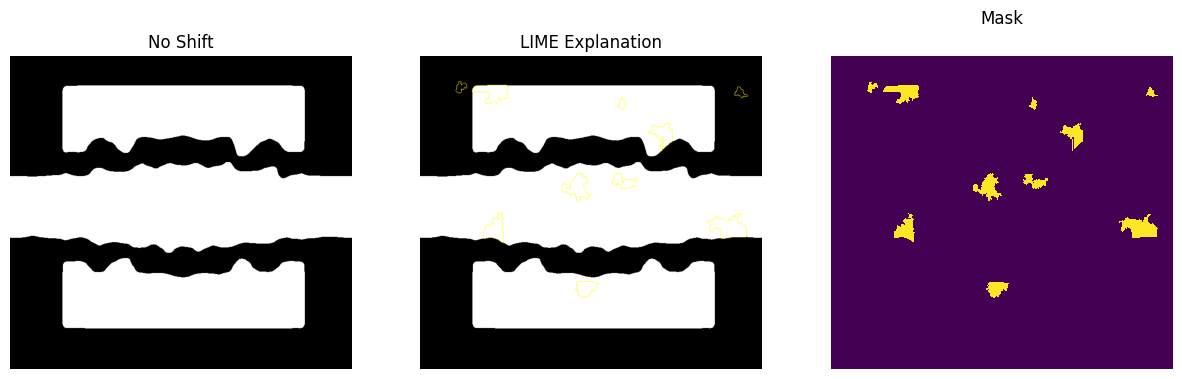

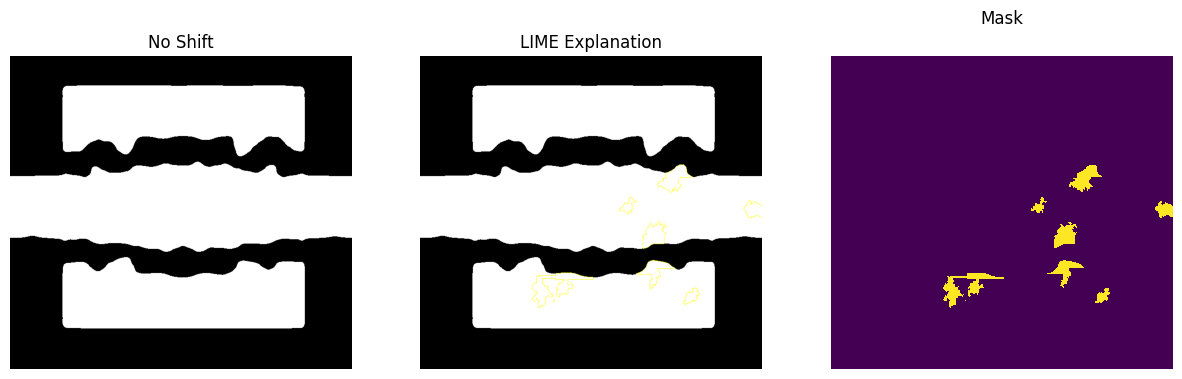

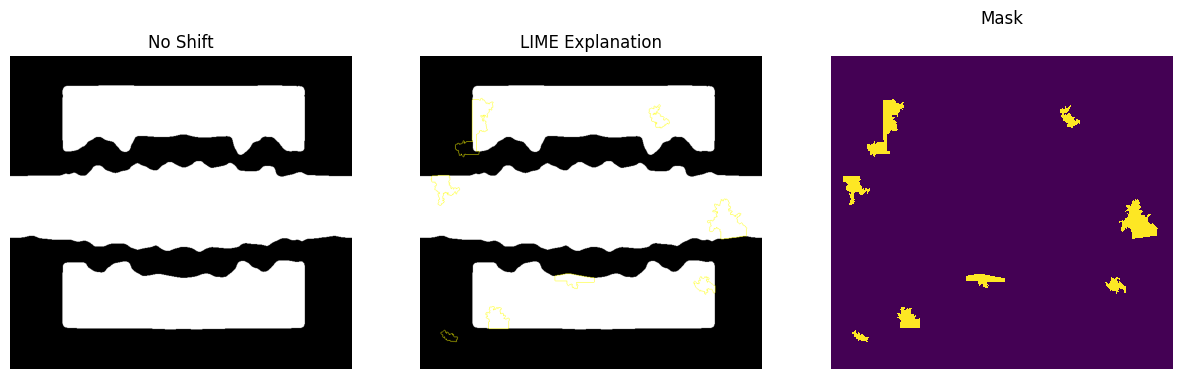

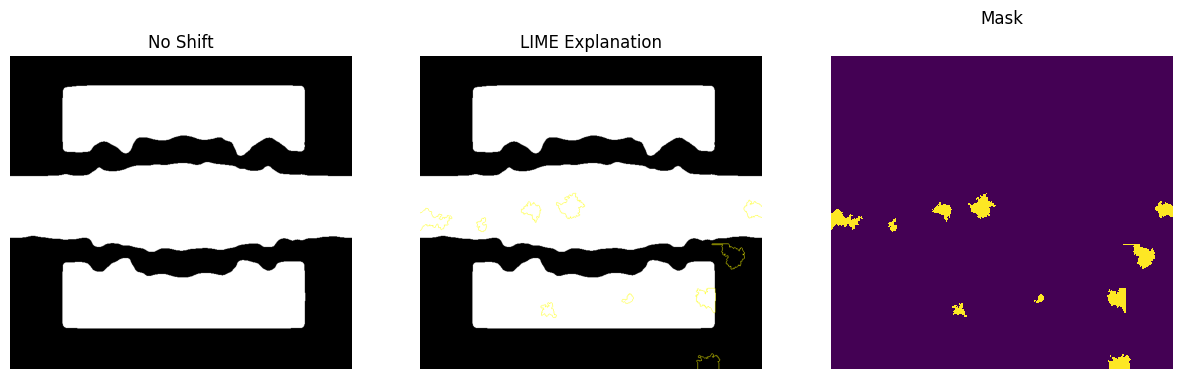

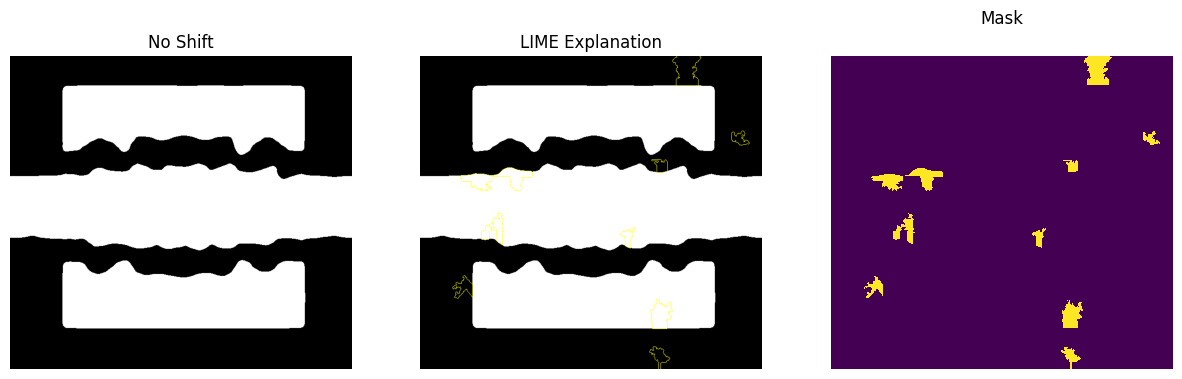

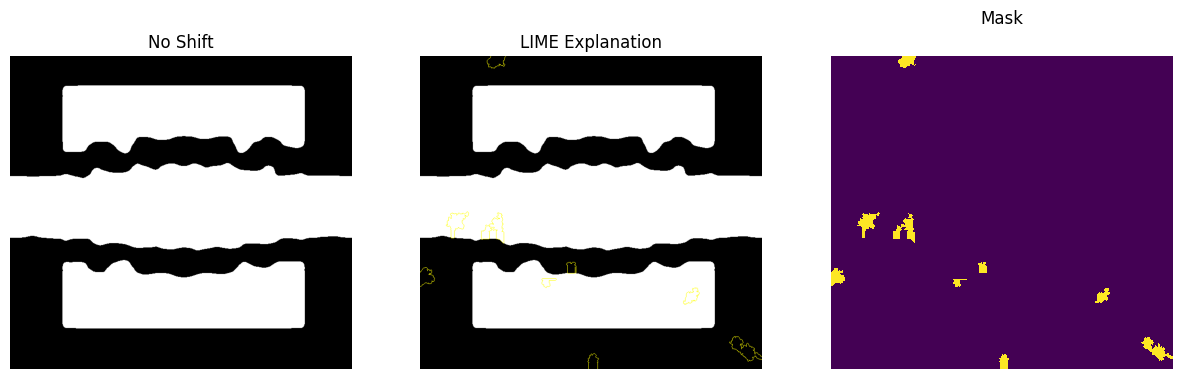

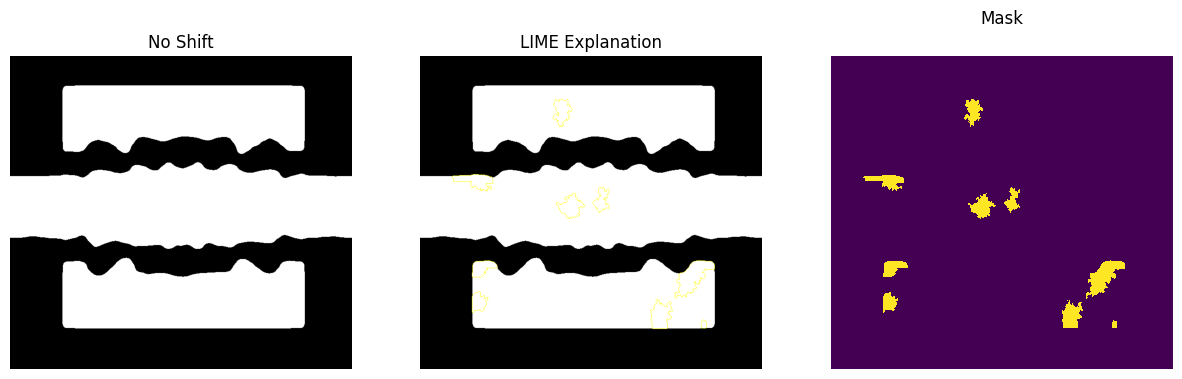

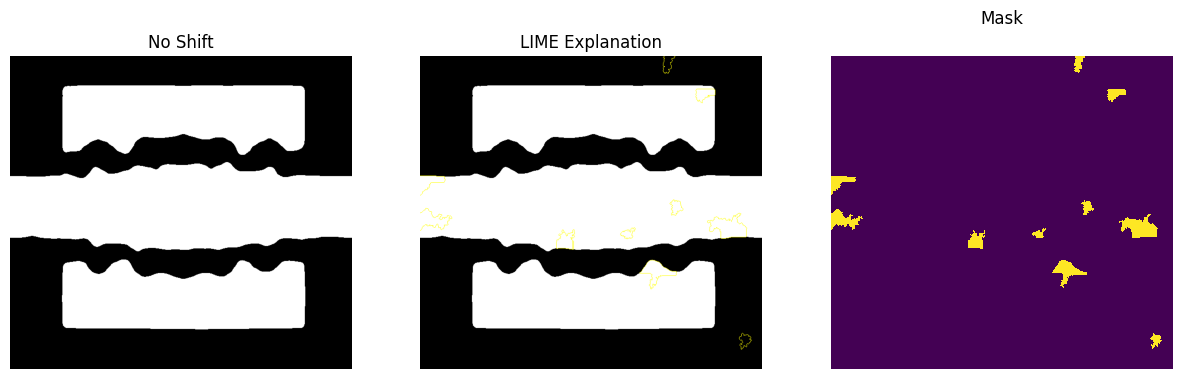

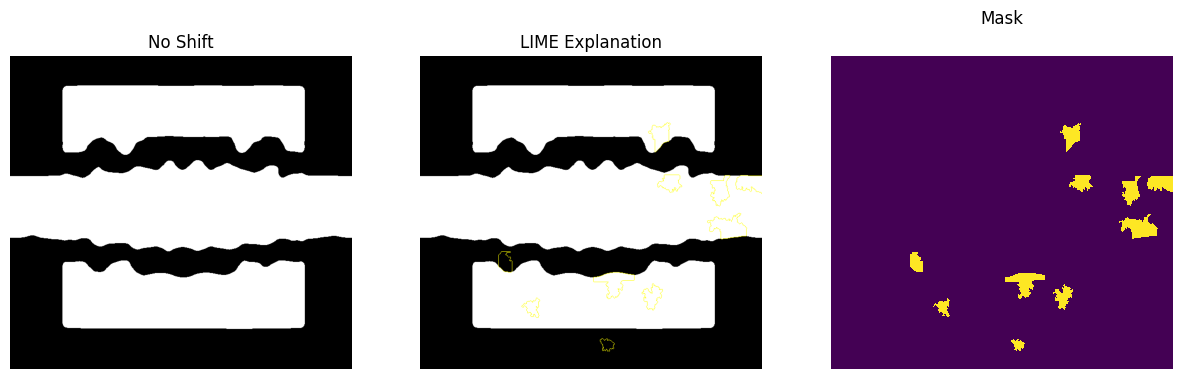

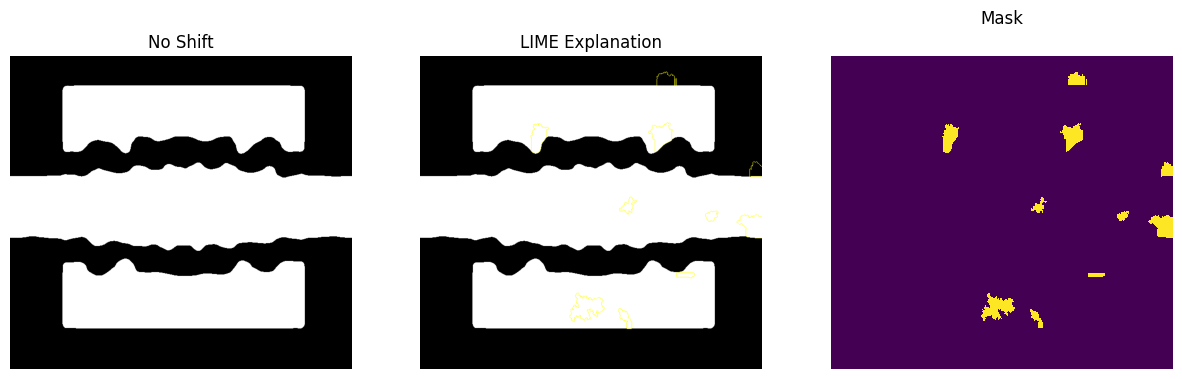

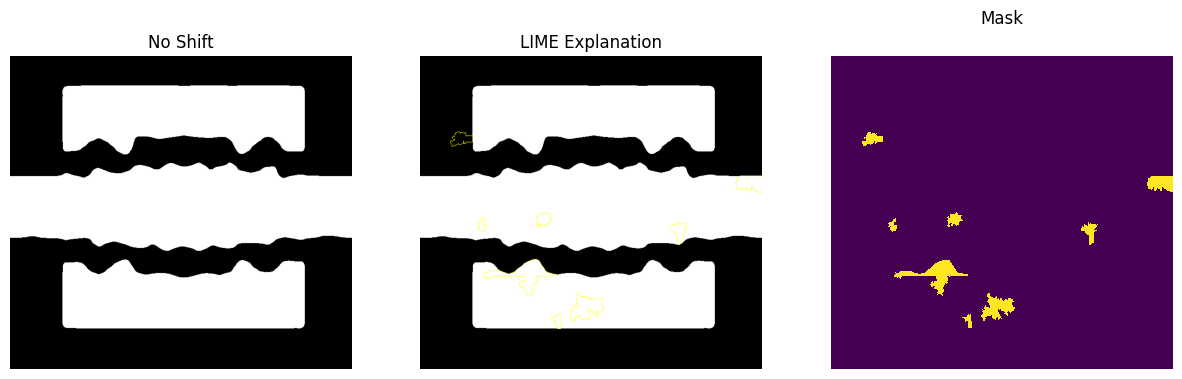

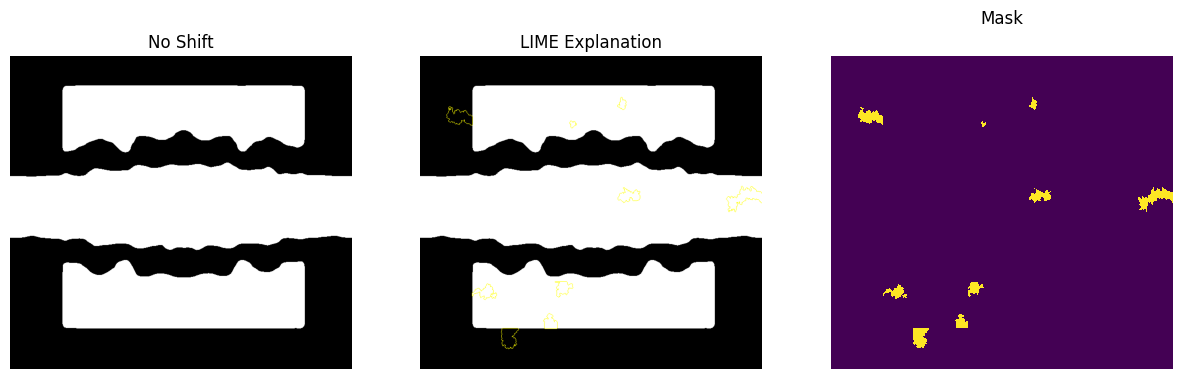

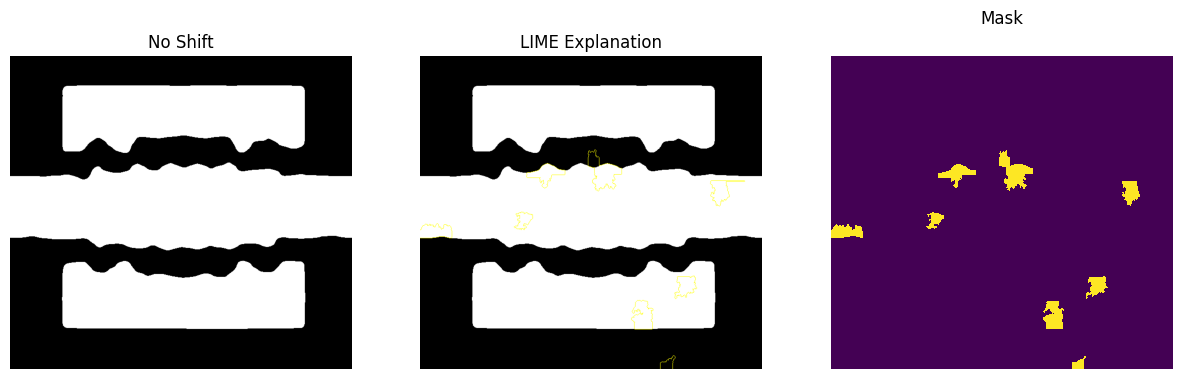

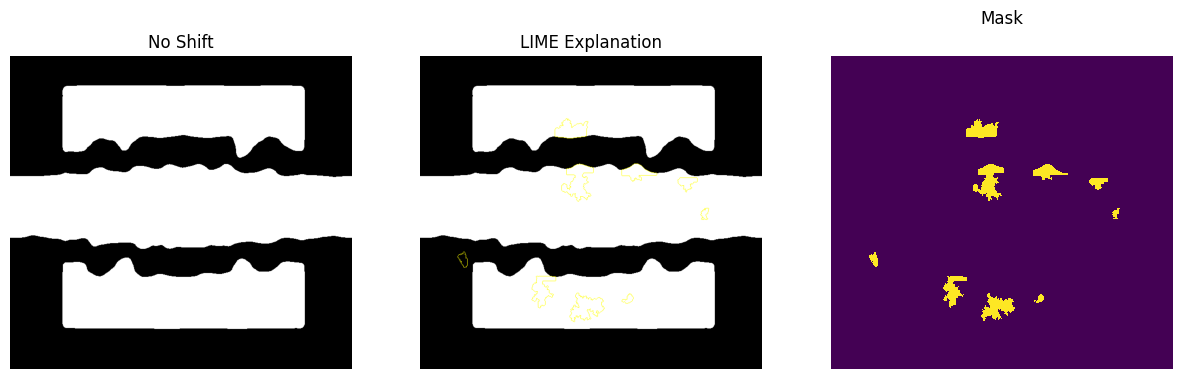

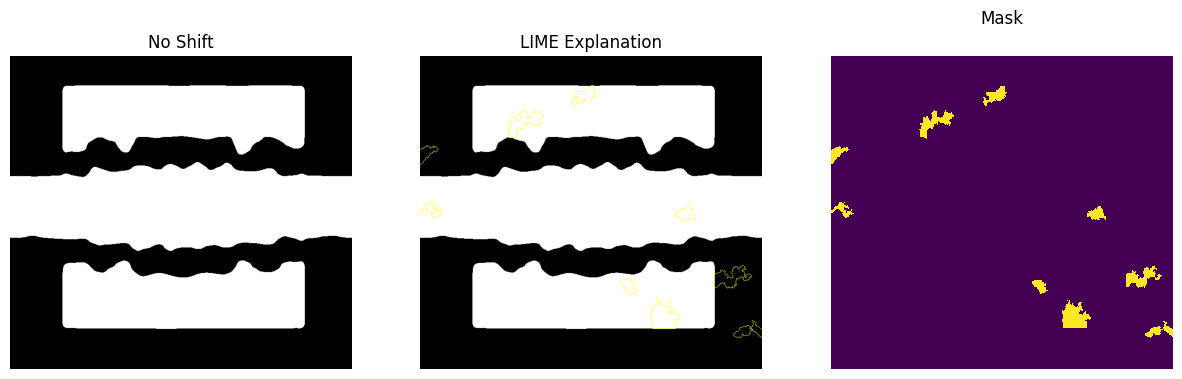

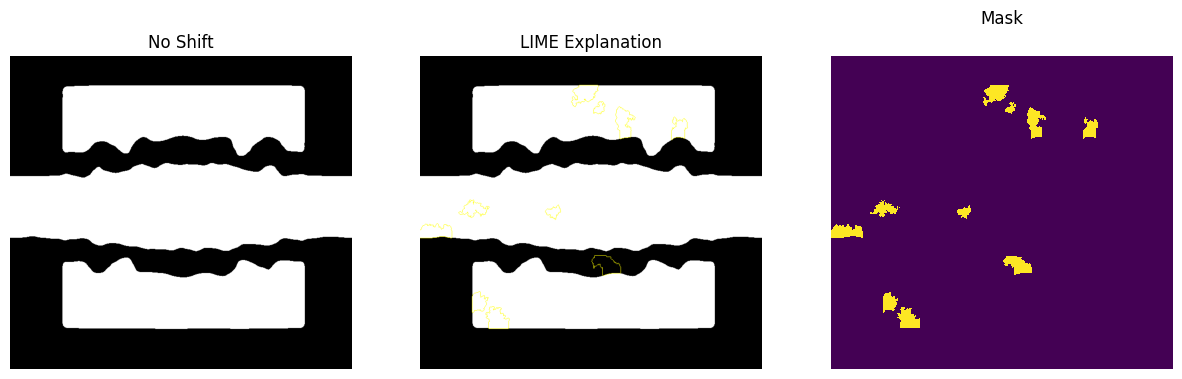

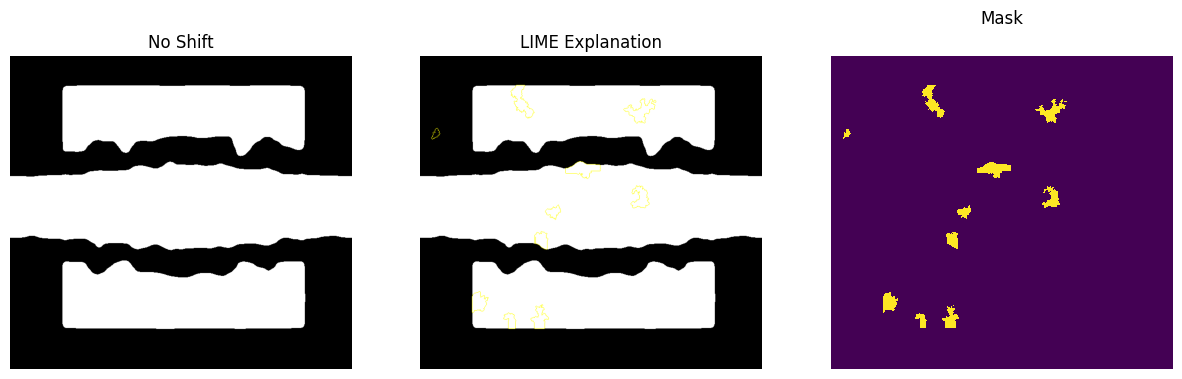

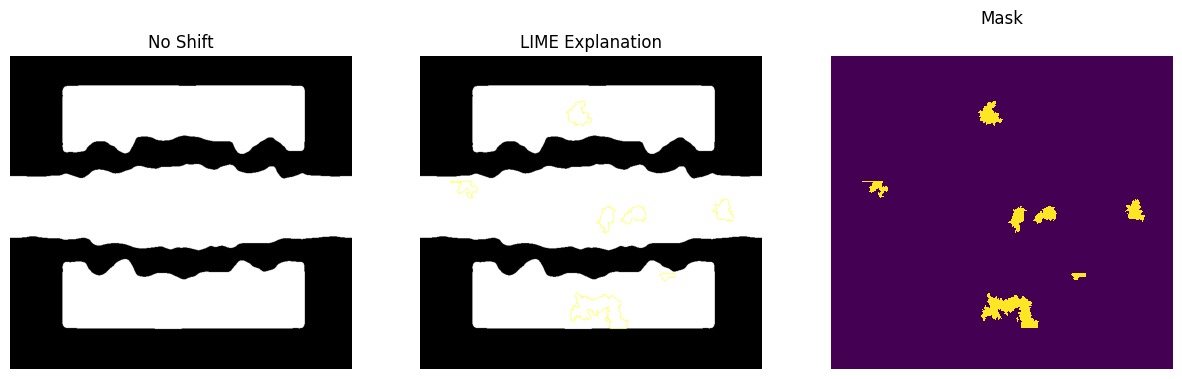

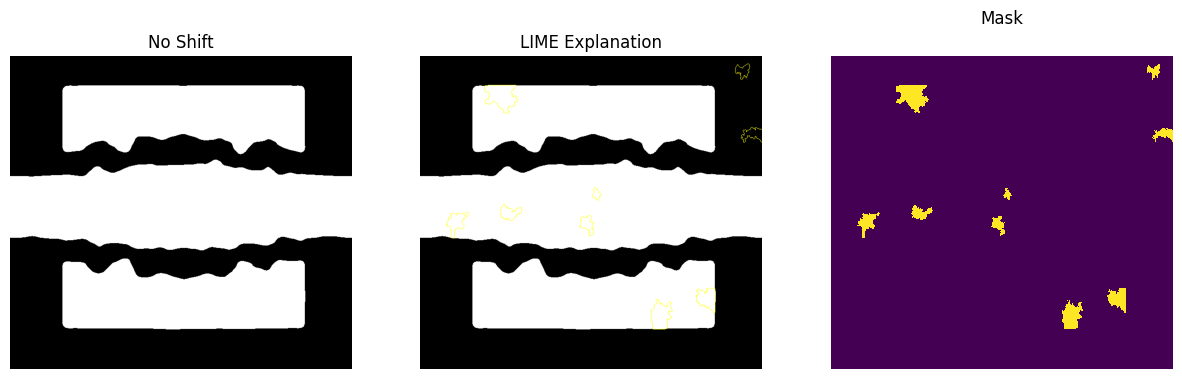

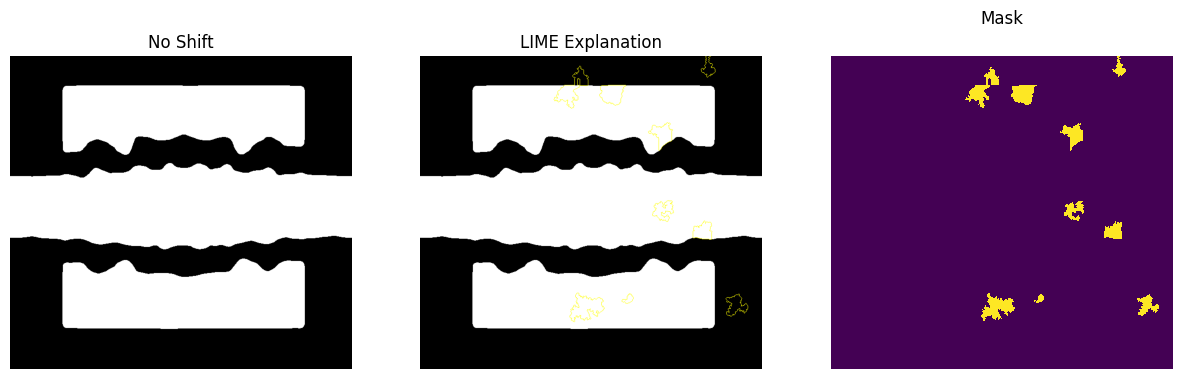

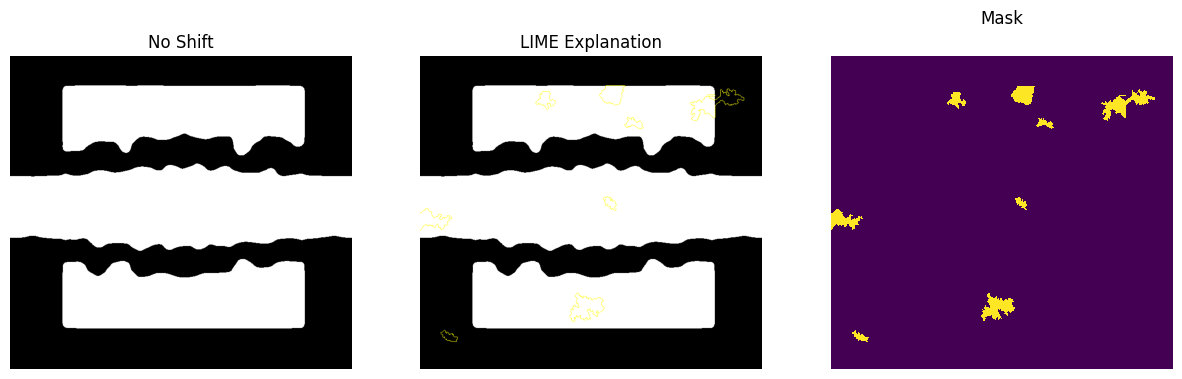

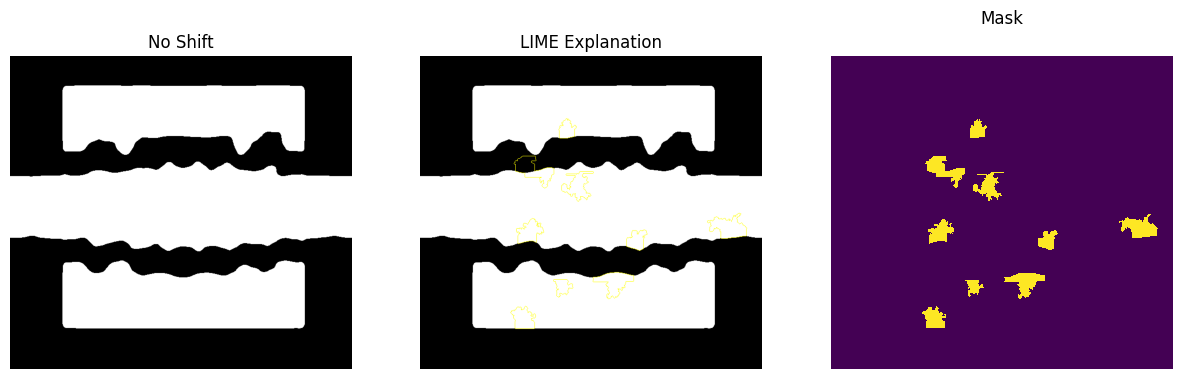

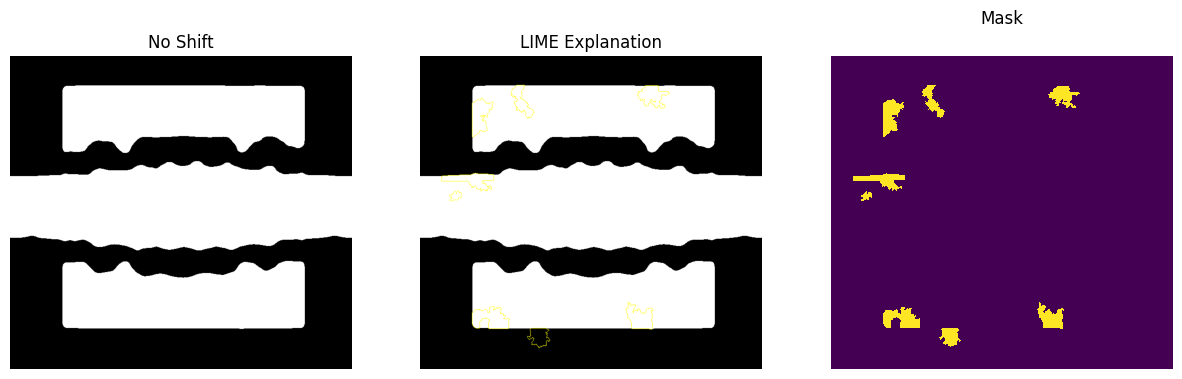

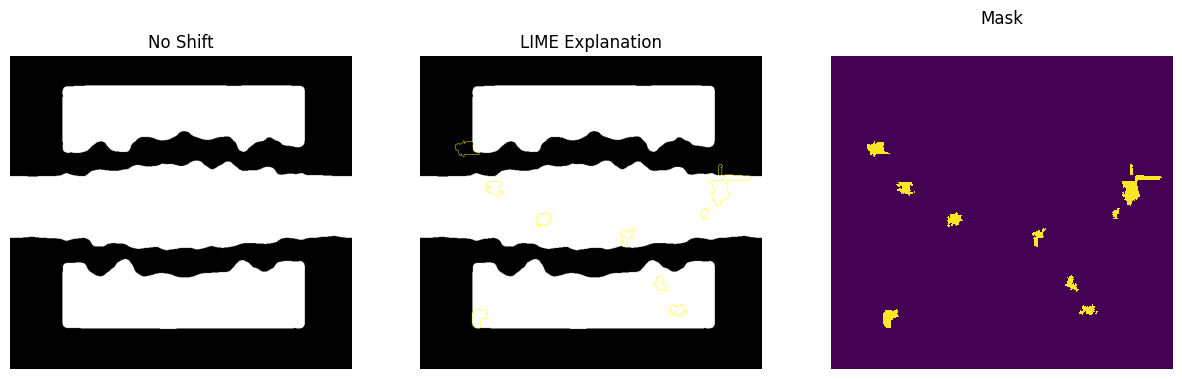

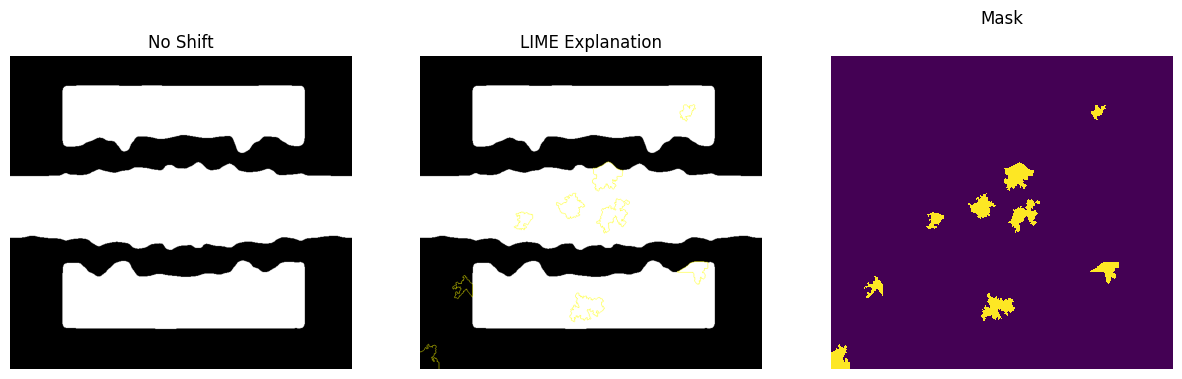

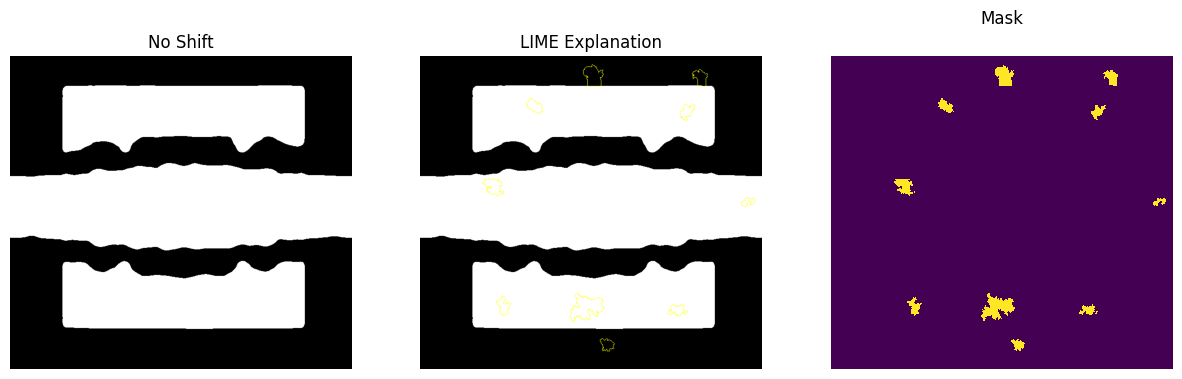

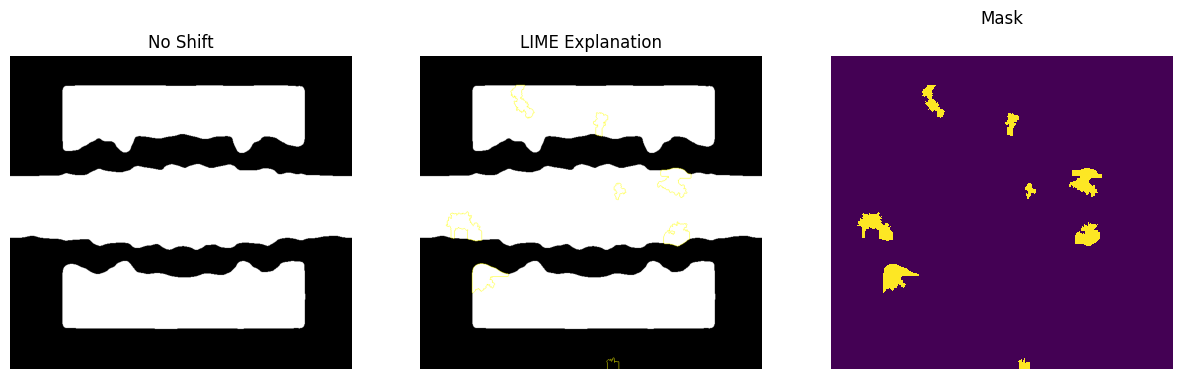

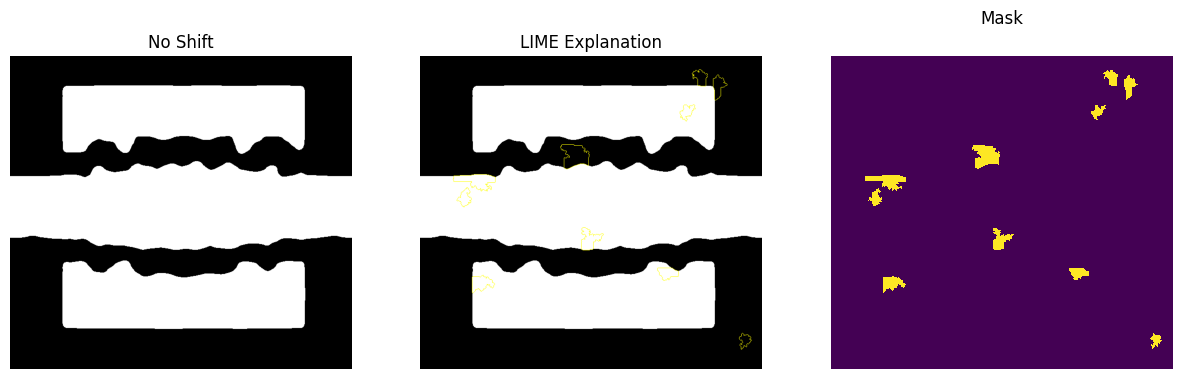

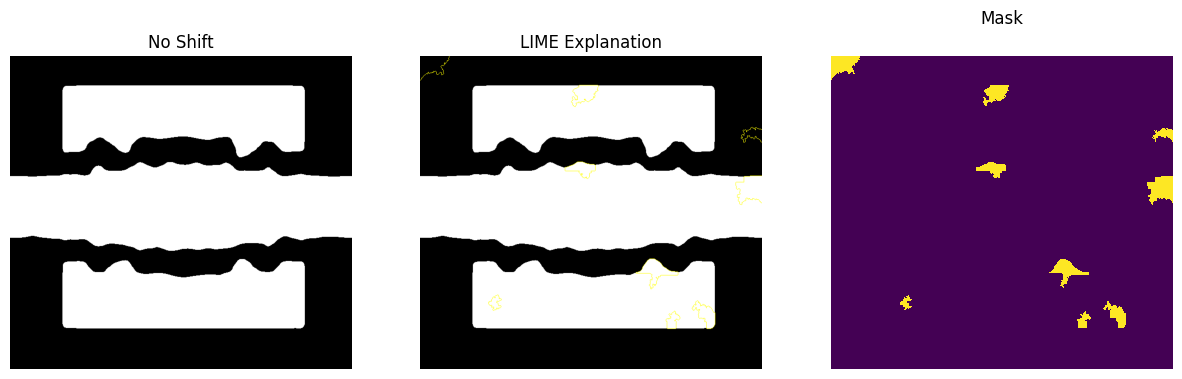

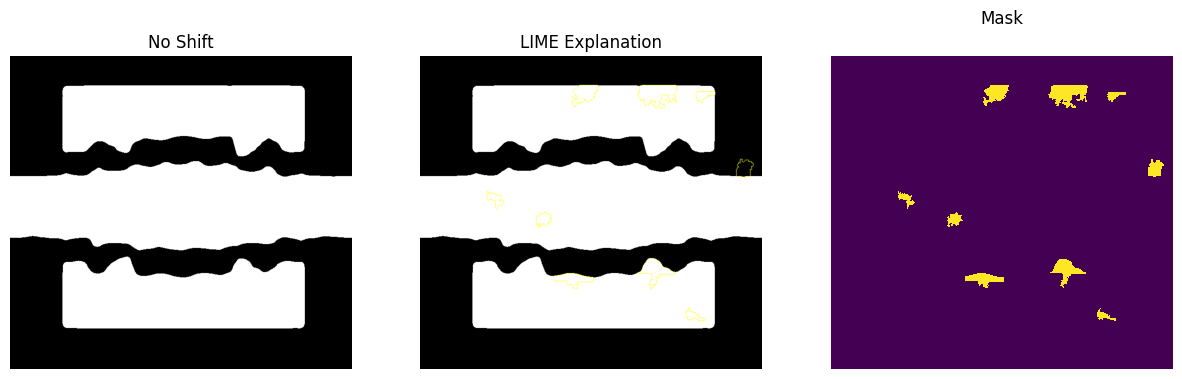

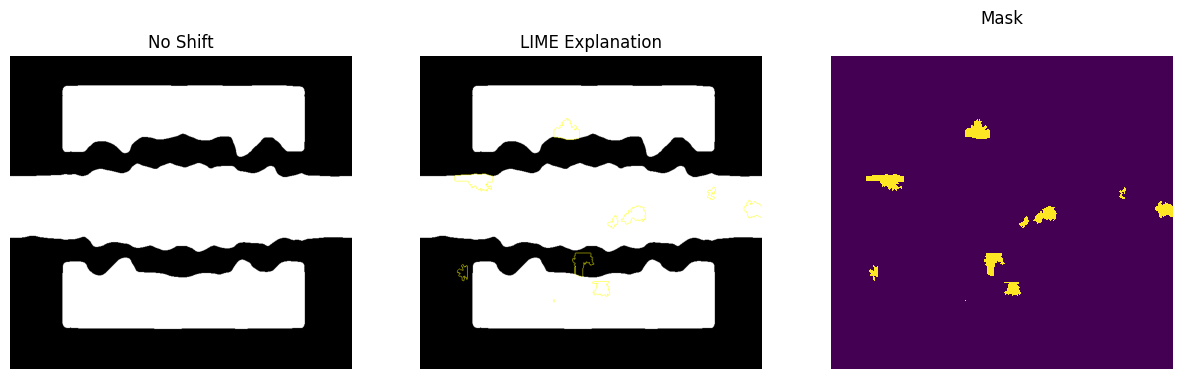

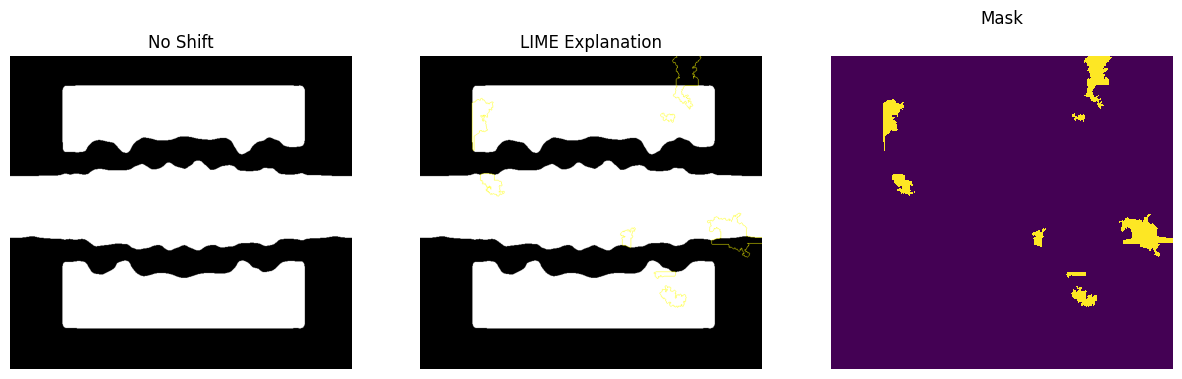

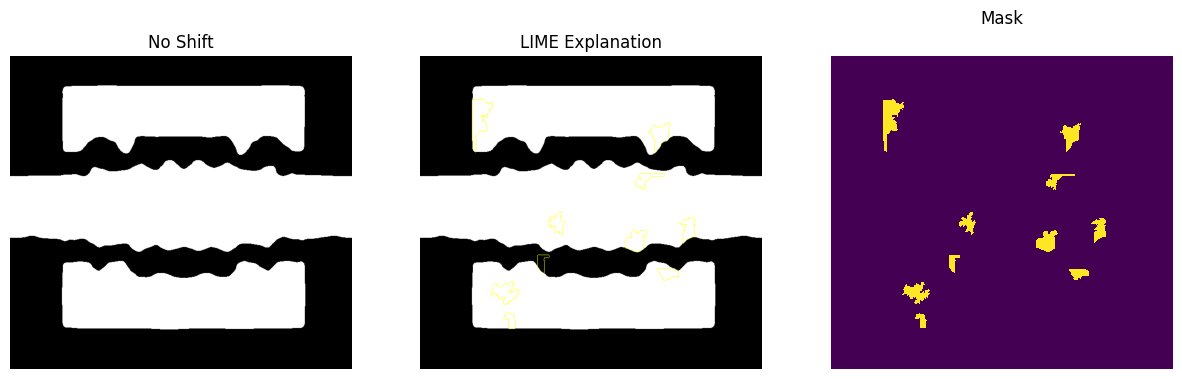

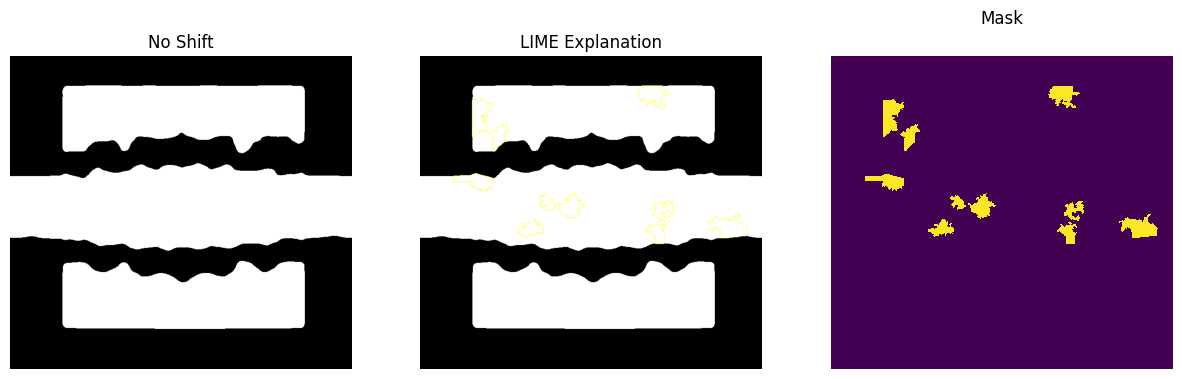

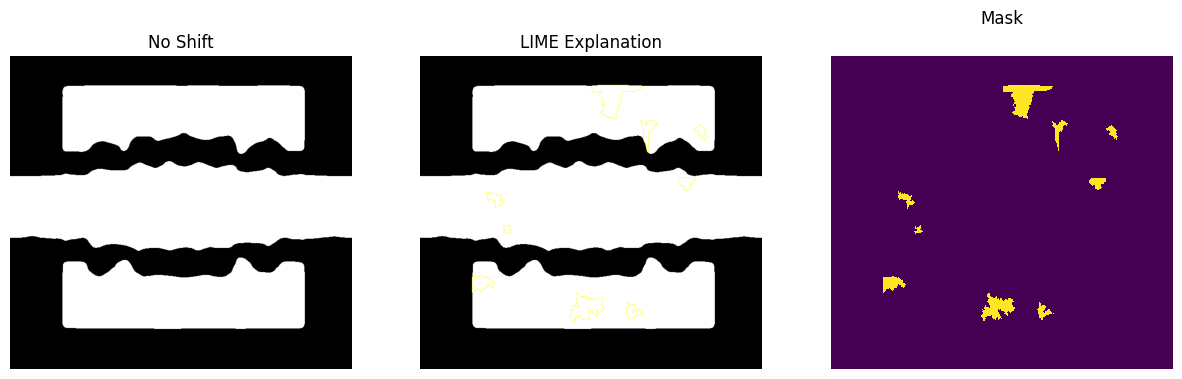

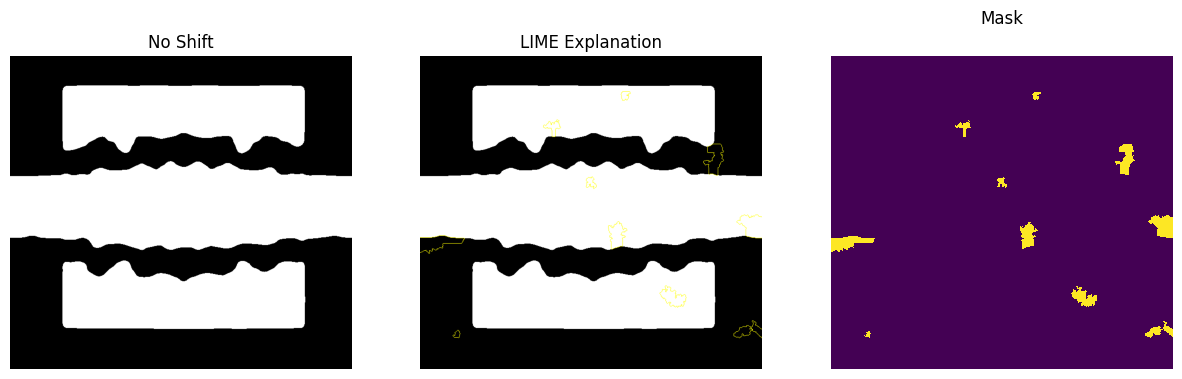

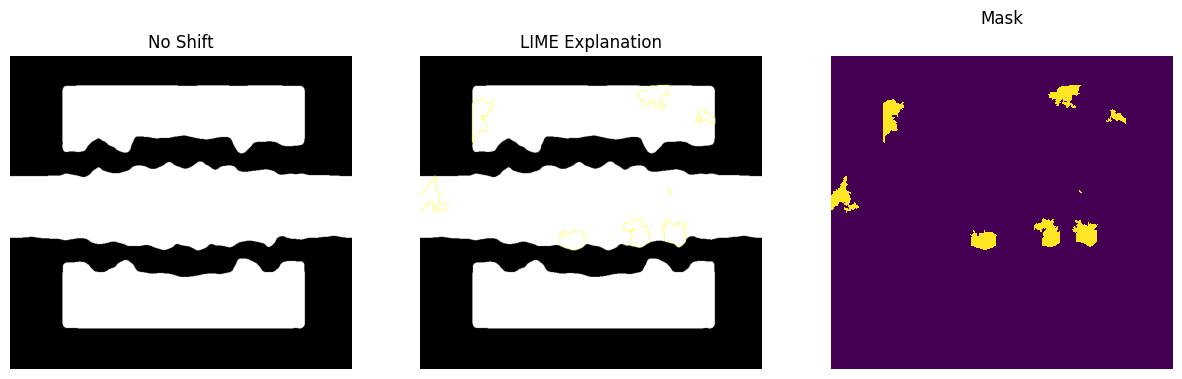

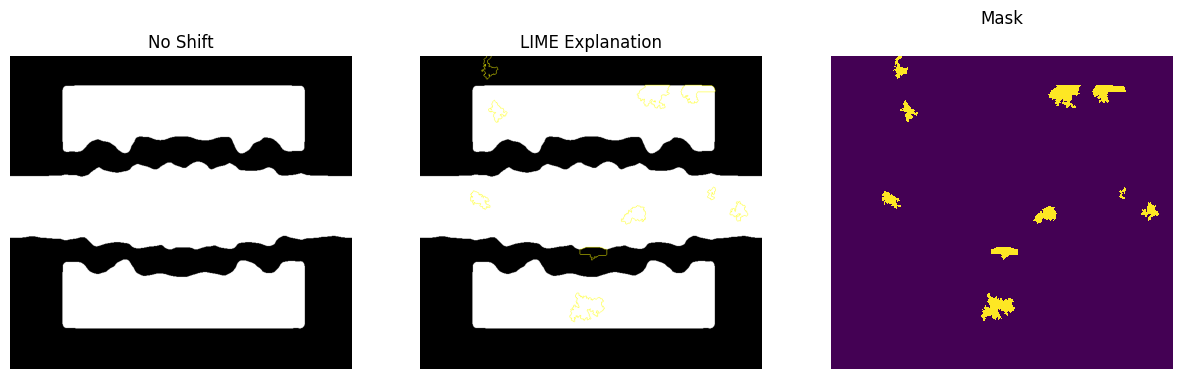

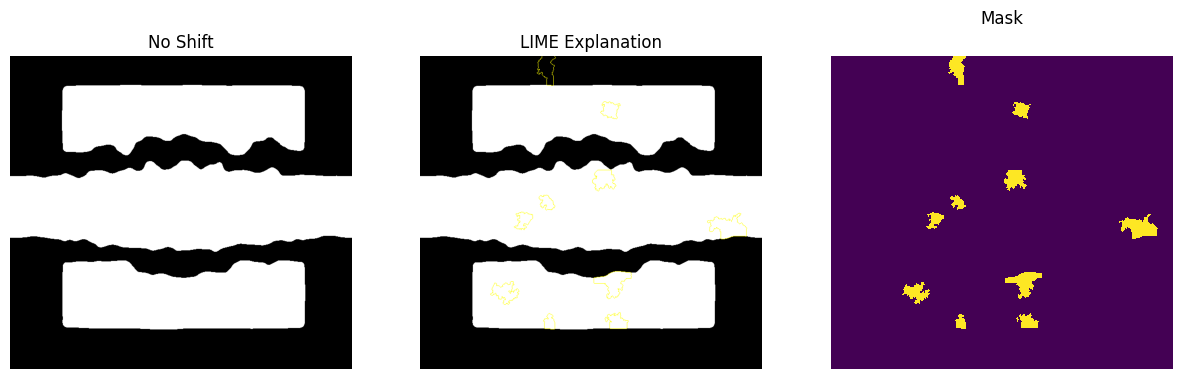

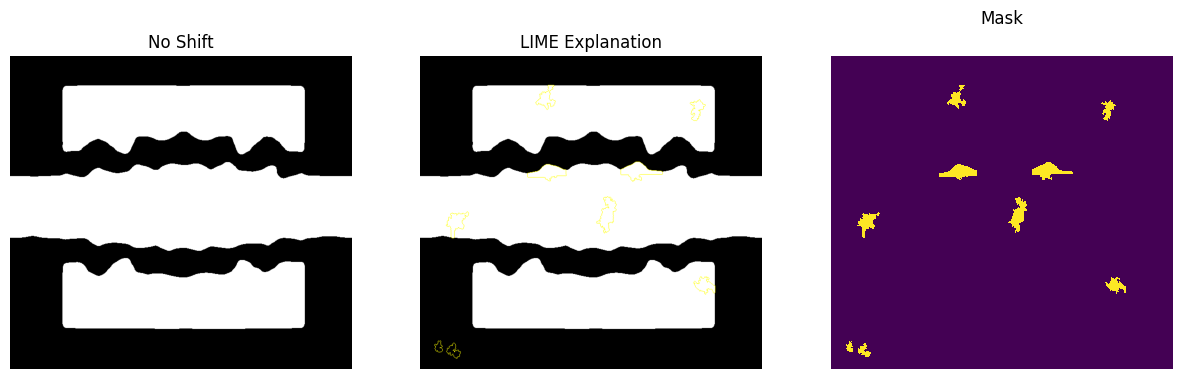

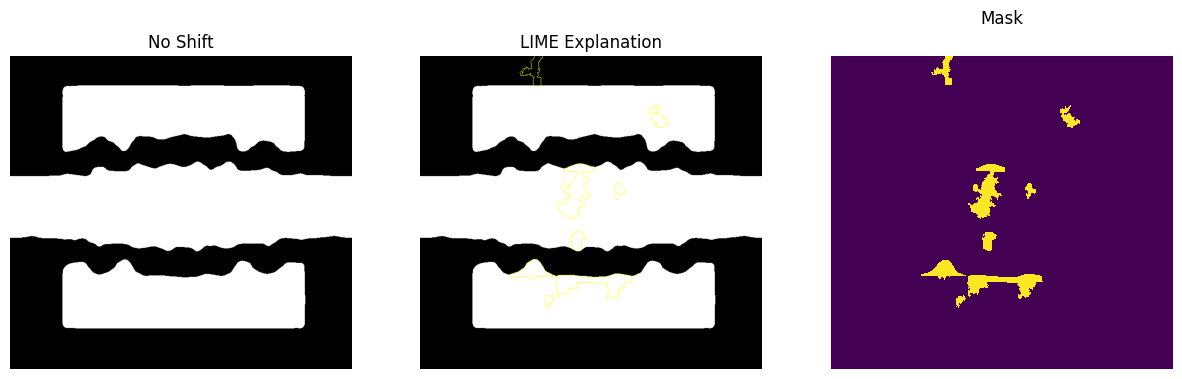

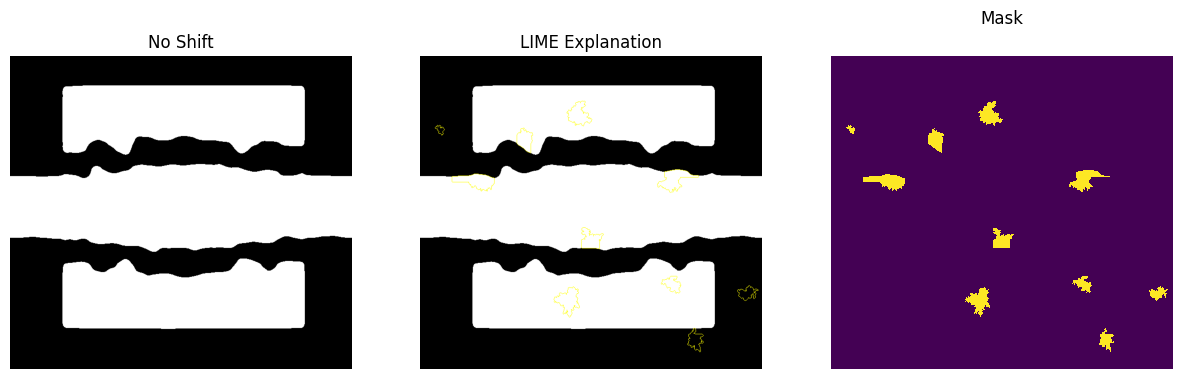

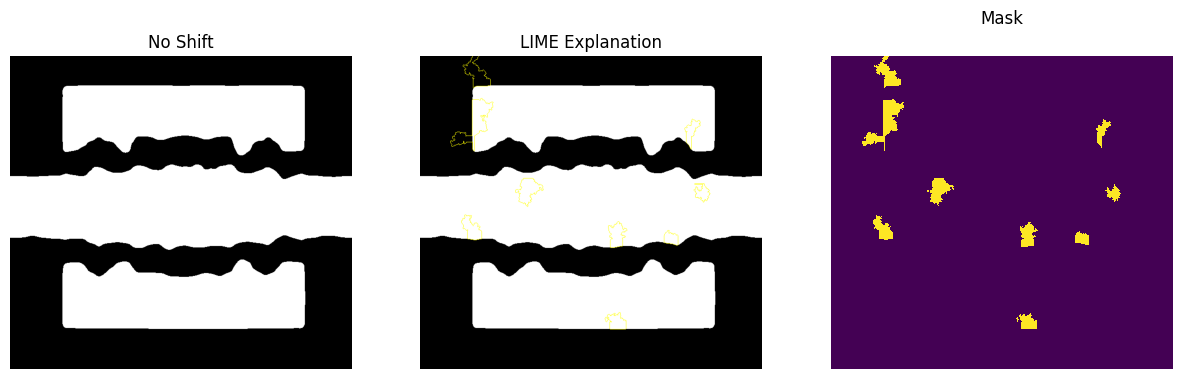

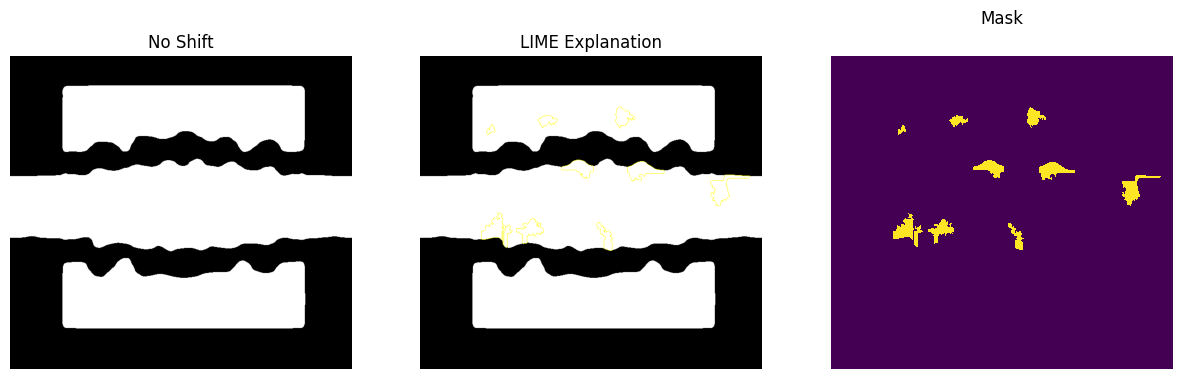

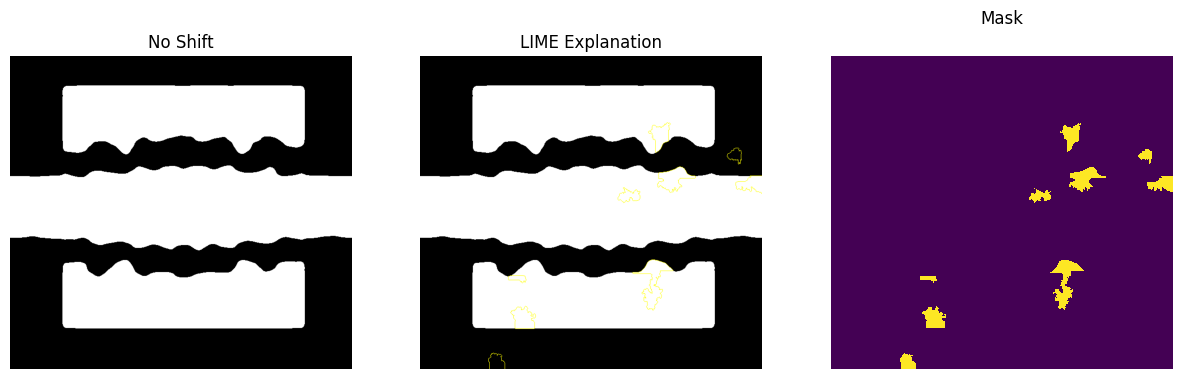

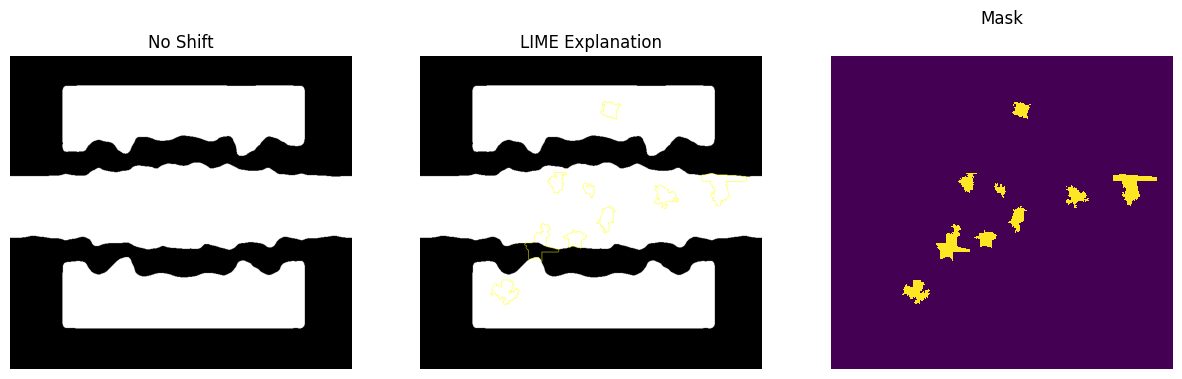

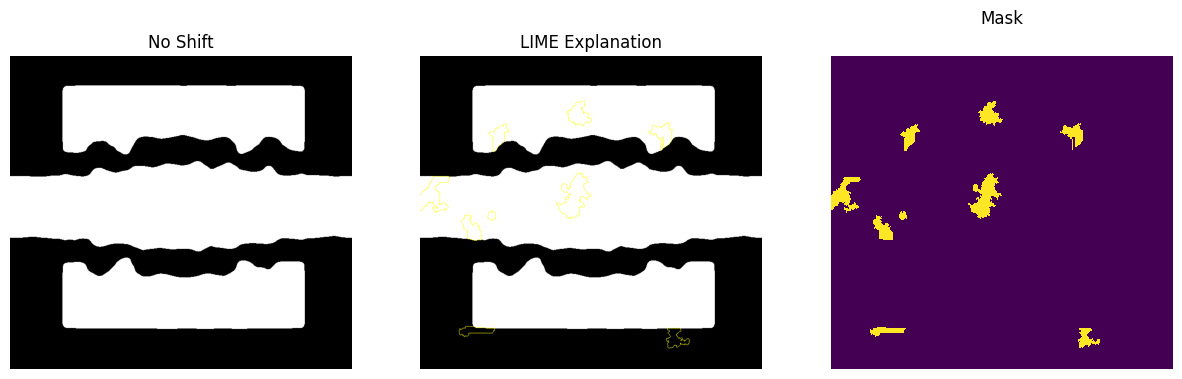

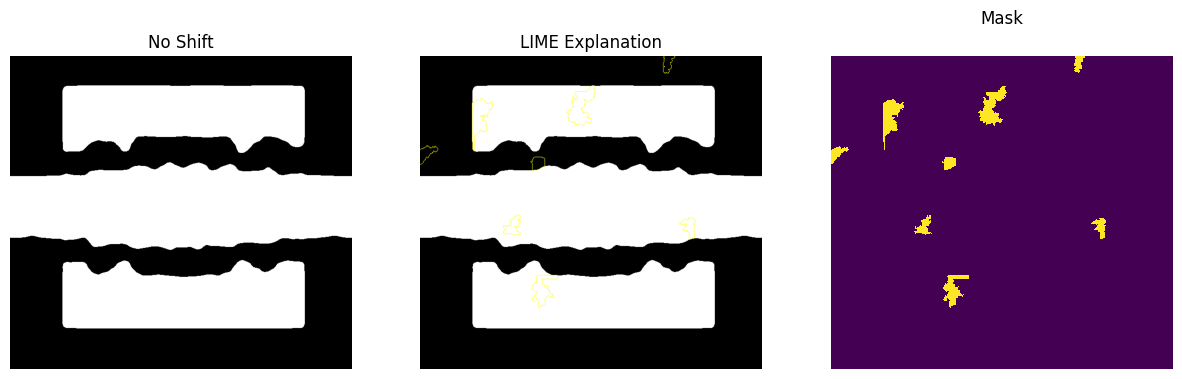

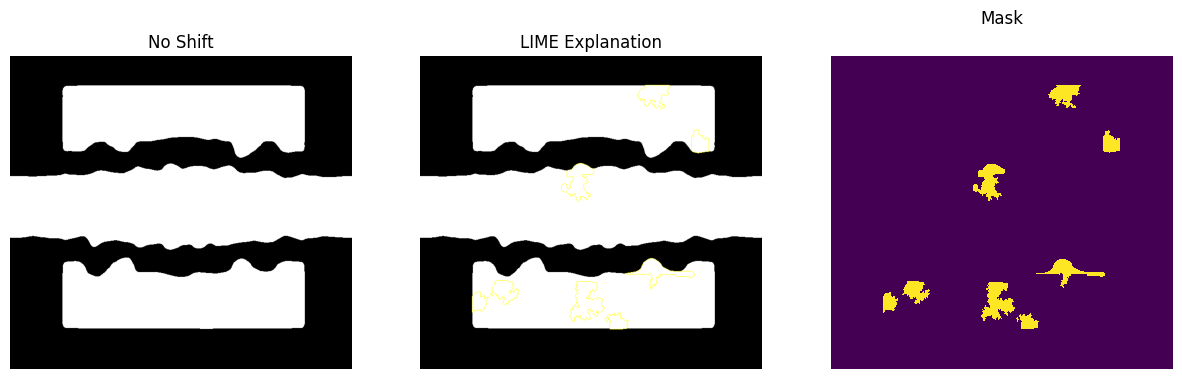

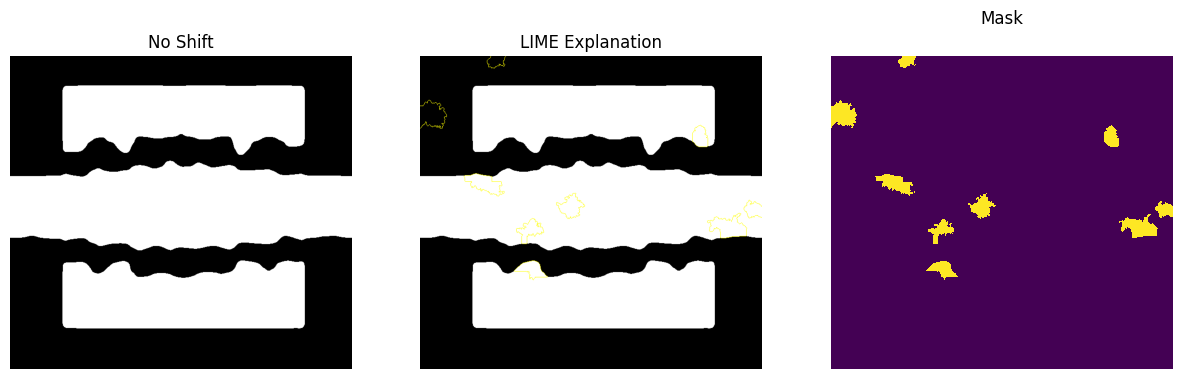

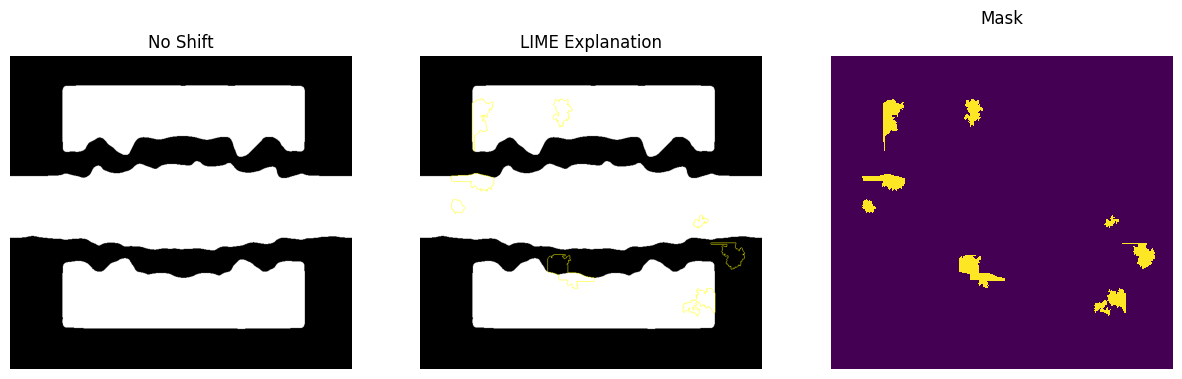

In [8]:
from skimage.segmentation import mark_boundaries
from lime import lime_image  # Import lime_image
import cv2
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported if not already

def predict_fn(images):
    # Ensure images are in the shape expected by the model
    if images.shape[-1] == 3:  # Convert RGB to grayscale if necessary
        images = np.mean(images, axis=-1, keepdims=True)
    features = model.predict(images)
    return features.reshape(features.shape[0], -1)  # Reshape for LIME compatibility

explainer = lime_image.LimeImageExplainer()
i = 0

for image in images:
    # Prepare the full-sized image in grayscale for LIME by converting to RGB
    sample_image = cv2.cvtColor((image * 255).astype('uint8').squeeze(), cv2.COLOR_GRAY2RGB)

    with SuppressOutput():
        explanation = explainer.explain_instance(
            sample_image.astype('double'),
            predict_fn,
            top_labels=1,
            hide_color=0,
            num_samples=200
        )

        # Get the image and mask for the top label
        temp, mask = explanation.get_image_and_mask(
            explanation.top_labels[0],
            positive_only=True,
            num_features=10,
            hide_rest=False
        )

    # Display the full-sized original image and the LIME explanation
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.imshow(sample_image, cmap='gray')
    if labels[i][0] == 1:
        ax1.set_title("No Shift")
    elif labels[i][1] == 1:
        ax1.set_title("Pi/2 Shift")
    else:
        ax1.set_title("Zero Shift")
    ax1.axis('off')

    ax2.imshow(mark_boundaries(temp, mask))
    ax2.set_title('LIME Explanation')
    ax2.axis('off')

    ax3.matshow(mask)
    ax3.set_title("Mask")
    ax3.axis('off')

    i += 1

plt.show()
